# Set up

In [1]:
import numpy as np
import scipy.constants as cc

from tabulate import tabulate

import matplotlib.pyplot as plt
from importlib import reload
# from matplotlib import ticker

from RashbaJunction import (RashbaJunction, PureRashba, EnergyOutOfRangeError, InsulatorError)
from RashbaJunction.utilities import adjuct_Tick, make_grid, error_decorator
from RashbaJunction.ScatteringMatrix import ScatteringMatrix

ev_to_j = 1.602176634e-19

hbar = 6.582119569e-16
m = 0.015*cc.m_e
h_xy = 0.1e-3*ev_to_j# mJ

# k_z = np.sqrt(2*m*h_xy/ev_to_j)/hbar
k_z = np.sqrt(2*m*h_xy)/cc.hbar# 1/Metr


x = 500e-9# Metr
x_prime =  k_z*x# adimensional
print(f"k_so {k_z}")
print(f"x' {x_prime}")

BASE_PATH = "plots/paper_plots_2/paper/"
FINAL_PATH = BASE_PATH+"fig_final/"


print(BASE_PATH)
print(FINAL_PATH)

k_so 6274572.777578376
x' 3.137286388789188
plots/paper_plots_2/paper/
plots/paper_plots_2/paper/fig_final/


In [2]:
font = {'family': "Times New Roman", "size": 25}

# y_label = [r"$$\frac{2 \pi \hbar}{q^2} G$$", r"$$-\frac{6 \hbar}{q \pi k_b^2 T}L$$"]
# y_label = [r"$$ \frac{G}{G_0}$$", r"$$-\frac{6 \hbar}{q \pi k_b^2 T}L$$"]
# x_label = r"$$\frac{E}{E_Z}$$"
y_label = [r"$$ G [e^2/h]$$", r"$$T_0$$"]
x_label = [r"$E_F / E_Z$", "$E_F / E_{SO, L}$", "$E_F / E_{SO}$", "$k_{SO, L}\, d$", "$E_{SO, L} / E_{SO, R}$"]

y_label_pos = [(-.05, 1.03), (-.09, 1)]

# legend_font_size = 15
legend_font_size = 18

region_lbl = ["(a)", "(b)", "(c)"]

DPI = 110

# Single interface

## Different regimes

Pannello (a)
* curva 1: $2E_{SO(L)} = 3*E_Z; 2E_{SO(R)} = 0.5*E_Z$
* curva 2: $2_{ESO(L)} = 2*E_Z; 2E_{SO(R)} = 5*E_Z$
* curva 3: $2E_{SO(L)} = 0.3*E_Z; 2E_{SO(R)} = 0.5*E_Z$

Pannello (b)
* curva 1: $2E_{SO(L)} = -3*E_Z; 2E_{SO(R)} = 0.5*E_Z$
* curva 2: $2E_{SO(L)} = -2*E_Z; 2E_{SO(R)} = 5*E_Z$
* curva 3: $2E_{SO(L)} = -0.3*E_Z; 2E_{SO(R)} = 0.5*E_Z$

In [3]:
alp_r = -10
Eso_profile = [0, alp_r]
x_profile = [0]

junction = RashbaJunction([x_profile, Eso_profile])

@error_decorator
def g(x, par):
    junction[0] = par[0]/2
    junction[1] = par[1]/2
    S = junction.get_scattering_matrix(x)
    if not S.is_unitary:
        print(f"not unitary matrix length: x-> {x}, par-> {par}")
        return np.nan
    else:
        return S.t_coef


# def g(x, par):
#     junction[0] = par[0]/2
#     junction[1] = par[1]/2
#     try:
#         S = junction.get_scattering_matrix(x)
#         if not S.is_unitary:
#             print(f"not unitary matrix length: x-> {x}, par-> {par}")
#             return np.nan
#         else:
#             return S.t_coef
#     except EnergyOutOfRangeError as e:
#         print(e, f"{x=}, {par=}")
#         return np.nan
#     except InsulatorError as e:
#         print(e, f"{x=}, {par=}")
#         return np.nan

param = [(.3, .5+1e-8),
         (2, 5),
         (3, .5+1e-8),
        (-.3, .5+1e-8),
         (-2, 5),
        (-3, .5+1e-8)]

en = np.arange(-1.25 + 1e-8, 2, 0.0011)

idx = np.abs(en + 1).argmin()
en[idx] = -1 + 1e-8

idx = np.abs(en - 1).argmin()
en[idx] = 1 - 1e-8

# idx = np.abs(en + 1.24).argmin()
# en[idx] = -1.25 + 1e-8

trasmission_coeff_total = make_grid(en, param, [g])#, gp])

SAVE = False

In Weak Zeeman regime E = -1.25 < -Eso (1 + (Ez/2Eso)^2) = -1.25 x=-1.24999999, par=(0.3, 0.50000001)
Inside one or both leads only evanescent modes are present. Scattering matrix can not be defined properly; fail to choose the initialisation method for scattering matrix x=-1.24889999, par=(0.3, 0.50000001)
Inside one or both leads only evanescent modes are present. Scattering matrix can not be defined properly; fail to choose the initialisation method for scattering matrix x=-1.2477999899999999, par=(0.3, 0.50000001)
Inside one or both leads only evanescent modes are present. Scattering matrix can not be defined properly; fail to choose the initialisation method for scattering matrix x=-1.2466999899999998, par=(0.3, 0.50000001)
Inside one or both leads only evanescent modes are present. Scattering matrix can not be defined properly; fail to choose the initialisation method for scattering matrix x=-1.2455999899999997, par=(0.3, 0.50000001)
Inside one or both leads only evanescent modes

Inside one or both leads only evanescent modes are present. Scattering matrix can not be defined properly; fail to choose the initialisation method for scattering matrix x=-1.0442999899999812, par=(0.3, 0.50000001)
Inside one or both leads only evanescent modes are present. Scattering matrix can not be defined properly; fail to choose the initialisation method for scattering matrix x=-1.043199989999981, par=(0.3, 0.50000001)
Inside one or both leads only evanescent modes are present. Scattering matrix can not be defined properly; fail to choose the initialisation method for scattering matrix x=-1.042099989999981, par=(0.3, 0.50000001)
Inside one or both leads only evanescent modes are present. Scattering matrix can not be defined properly; fail to choose the initialisation method for scattering matrix x=-1.040999989999981, par=(0.3, 0.50000001)
Inside one or both leads only evanescent modes are present. Scattering matrix can not be defined properly; fail to choose the initialisation me

In Weak Zeeman regime E = -1.25 < -Eso (1 + (Ez/2Eso)^2) = -1.25 x=-1.24999999, par=(3, 0.50000001)
Inside one or both leads only evanescent modes are present. Scattering matrix can not be defined properly; fail to choose the initialisation method for scattering matrix x=-1.24889999, par=(3, 0.50000001)
Inside one or both leads only evanescent modes are present. Scattering matrix can not be defined properly; fail to choose the initialisation method for scattering matrix x=-1.2477999899999999, par=(3, 0.50000001)
Inside one or both leads only evanescent modes are present. Scattering matrix can not be defined properly; fail to choose the initialisation method for scattering matrix x=-1.2466999899999998, par=(3, 0.50000001)
Inside one or both leads only evanescent modes are present. Scattering matrix can not be defined properly; fail to choose the initialisation method for scattering matrix x=-1.2455999899999997, par=(3, 0.50000001)
Inside one or both leads only evanescent modes are prese

Inside one or both leads only evanescent modes are present. Scattering matrix can not be defined properly; fail to choose the initialisation method for scattering matrix x=-1.1003999899999863, par=(3, 0.50000001)
Inside one or both leads only evanescent modes are present. Scattering matrix can not be defined properly; fail to choose the initialisation method for scattering matrix x=-1.0992999899999862, par=(3, 0.50000001)
Inside one or both leads only evanescent modes are present. Scattering matrix can not be defined properly; fail to choose the initialisation method for scattering matrix x=-1.0981999899999861, par=(3, 0.50000001)
Inside one or both leads only evanescent modes are present. Scattering matrix can not be defined properly; fail to choose the initialisation method for scattering matrix x=-1.097099989999986, par=(3, 0.50000001)
Inside one or both leads only evanescent modes are present. Scattering matrix can not be defined properly; fail to choose the initialisation method f

In Weak Zeeman regime E = -1.25 < -Eso (1 + (Ez/2Eso)^2) = -1.25 x=-1.24999999, par=(-0.3, 0.50000001)
Inside one or both leads only evanescent modes are present. Scattering matrix can not be defined properly; fail to choose the initialisation method for scattering matrix x=-1.24889999, par=(-0.3, 0.50000001)
Inside one or both leads only evanescent modes are present. Scattering matrix can not be defined properly; fail to choose the initialisation method for scattering matrix x=-1.2477999899999999, par=(-0.3, 0.50000001)
Inside one or both leads only evanescent modes are present. Scattering matrix can not be defined properly; fail to choose the initialisation method for scattering matrix x=-1.2466999899999998, par=(-0.3, 0.50000001)
Inside one or both leads only evanescent modes are present. Scattering matrix can not be defined properly; fail to choose the initialisation method for scattering matrix x=-1.2455999899999997, par=(-0.3, 0.50000001)
Inside one or both leads only evanescent 

Inside one or both leads only evanescent modes are present. Scattering matrix can not be defined properly; fail to choose the initialisation method for scattering matrix x=-1.0783999899999843, par=(-0.3, 0.50000001)
Inside one or both leads only evanescent modes are present. Scattering matrix can not be defined properly; fail to choose the initialisation method for scattering matrix x=-1.0772999899999842, par=(-0.3, 0.50000001)
Inside one or both leads only evanescent modes are present. Scattering matrix can not be defined properly; fail to choose the initialisation method for scattering matrix x=-1.0761999899999841, par=(-0.3, 0.50000001)
Inside one or both leads only evanescent modes are present. Scattering matrix can not be defined properly; fail to choose the initialisation method for scattering matrix x=-1.075099989999984, par=(-0.3, 0.50000001)
Inside one or both leads only evanescent modes are present. Scattering matrix can not be defined properly; fail to choose the initialisat

In Weak Zeeman regime E = -1.25 < -Eso (1 + (Ez/2Eso)^2) = -1.25 x=-1.24999999, par=(-3, 0.50000001)
Inside one or both leads only evanescent modes are present. Scattering matrix can not be defined properly; fail to choose the initialisation method for scattering matrix x=-1.24889999, par=(-3, 0.50000001)
Inside one or both leads only evanescent modes are present. Scattering matrix can not be defined properly; fail to choose the initialisation method for scattering matrix x=-1.2477999899999999, par=(-3, 0.50000001)
Inside one or both leads only evanescent modes are present. Scattering matrix can not be defined properly; fail to choose the initialisation method for scattering matrix x=-1.2466999899999998, par=(-3, 0.50000001)
Inside one or both leads only evanescent modes are present. Scattering matrix can not be defined properly; fail to choose the initialisation method for scattering matrix x=-1.2455999899999997, par=(-3, 0.50000001)
Inside one or both leads only evanescent modes are 

Inside one or both leads only evanescent modes are present. Scattering matrix can not be defined properly; fail to choose the initialisation method for scattering matrix x=-1.0783999899999843, par=(-3, 0.50000001)
Inside one or both leads only evanescent modes are present. Scattering matrix can not be defined properly; fail to choose the initialisation method for scattering matrix x=-1.0772999899999842, par=(-3, 0.50000001)
Inside one or both leads only evanescent modes are present. Scattering matrix can not be defined properly; fail to choose the initialisation method for scattering matrix x=-1.0761999899999841, par=(-3, 0.50000001)
Inside one or both leads only evanescent modes are present. Scattering matrix can not be defined properly; fail to choose the initialisation method for scattering matrix x=-1.075099989999984, par=(-3, 0.50000001)
Inside one or both leads only evanescent modes are present. Scattering matrix can not be defined properly; fail to choose the initialisation meth

<IPython.core.display.Javascript object>


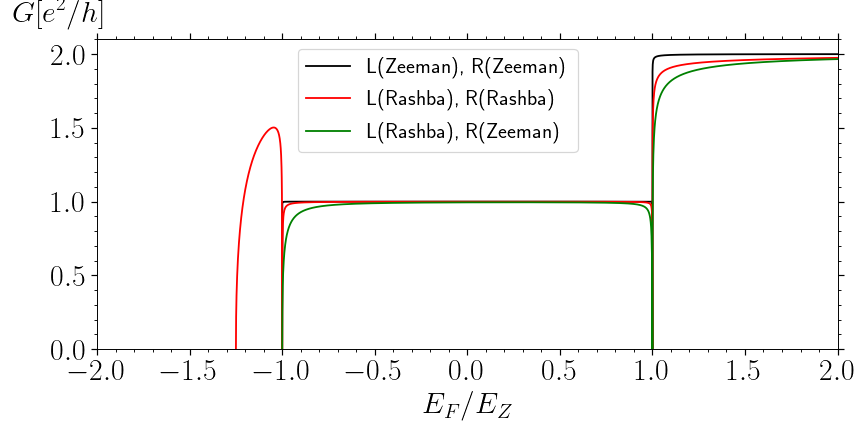

0.3
2
3
plots/paper_plots_2/paper/fig_final/Fig_2_a.pdf


In [4]:
# %matplotlib inline

reload(plt)
%matplotlib notebook
%matplotlib notebook
import matplotlib.pyplot as plt 


plt.rcParams['text.usetex'] = True

fig, axs = plt.subplots(1, figsize=(10, 5), dpi=DPI, tight_layout=True, facecolor='white')

k_list = list(trasmission_coeff_total.keys())

lable_map = {2.0: "Rashba", 3.0: "Rashba", 5.0: "Rashba", 0.3: "Zeeman", 0.5: "Zeeman", 0: "Zeeman"}
colors = ["black", "r", "g"]

for i, k in enumerate(k_list[:3]):
    print(k[0])
#     fr"$2E_{{SO}}^{{(L)}} = {lable_map[round(k[0],1)]}  E_Z$,"
#                              fr"\ $2E_{{SO}}^{{(R)}} = {lable_map[round(k[0],1)]}  E_Z $"
    lbl_string = f"L({lable_map[round(k[0],1)]}), R({lable_map[round(k[1],1)]})"
    axs.plot(en, trasmission_coeff_total[k][0],
                   label=lbl_string, color=colors[i])

# axs.text(-.1, 1.225, region_lbl[0],
#             horizontalalignment='center', 
#             verticalalignment='center', 
#             transform=axs.transAxes, 
#             fontdict=font)
 
axs.set_ylim(0,2.1)
axs.set_xlim(-2, 2)

# axs.grid()
axs.legend(fontsize = legend_font_size, bbox_to_anchor=(0.46, 0.6))
axs.set_xlabel(x_label[0], fontdict=font)
axs.set_ylabel(y_label[0], rotation=0, fontdict=font)


axs.yaxis.set_label_coords(*y_label_pos[0])

x_magior = np.array([.5])
x_minor = np.array([0.1])

y_magior = np.array([0.5])
y_minor = np.array([0.1])
adjuct_Tick(np.array([axs]), x_magior=x_magior, 
                    x_minor=x_minor, 
                    y_magior=y_magior, 
                    y_minor=y_minor, 
                    size =font["size"])

# plt.title(r"$k_{SO} \, d = "+f"{k_list[0][0]}$", 
# plt.title(r"$E_{SO} = "+f"{k_list[0][1]}E_Z$", 
#               fontsize = 25, x=0.5, y=1.1)

# SAVE = True
SAVE = False
off = 0
# save_path = BASE_PATH+f"single_interface_Eso=({k_list[off+0][0]:.1f}, {k_list[off+0][1]:.1f})({k_list[off+1][0]:.1f}, {k_list[off+1][1]:.1f})({k_list[off+2][0]:.1f}, {k_list[off+2][1]:.1f})EZ.pdf"
save_path = FINAL_PATH+f"Fig_2_a.pdf"
print(save_path)

if SAVE:
    plt.savefig(save_path, 
            transparent = False, 
            bbox_inches='tight')

plt.show()

<IPython.core.display.Javascript object>


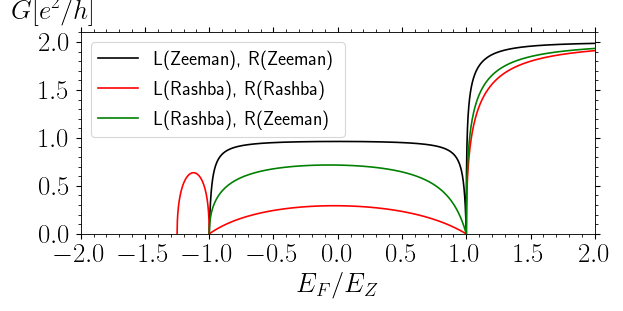

-0.3
-2
-3
plots/paper_plots_2/paper/fig_final/Fig_2_b.pdf


In [5]:
# %matplotlib inline

reload(plt)
%matplotlib notebook
%matplotlib notebook
import matplotlib.pyplot as plt 


plt.rcParams['text.usetex'] = True

fig, axs = plt.subplots(1, figsize=(10, 5), dpi=100, tight_layout=True, facecolor='white')

k_list = list(trasmission_coeff_total.keys())

# colors = ["g", "r", "black"]
colors = ["black", "r", "g"]

lable_map = {-2.0: "Rashba", -3.0: "Rashba", 5.0: "Rashba", -0.3: "Zeeman", 0.5: "Zeeman"}
for i, k in enumerate(k_list[3:]):
    print(k[0])
#     fr"$2E_{{SO}}^{{(L)}} = {lable_map[round(k[0],1)]}  E_Z$,"
#                              fr"\ $2E_{{SO}}^{{(R)}} = {lable_map[round(k[0],1)]}  E_Z $"
    lbl_string = f"L({lable_map[round(k[0],1)]}), R({lable_map[round(k[1],1)]})"
    axs.plot(en, trasmission_coeff_total[k][0],
                   label=lbl_string,
                    color= colors[i])

# axs.text(-.1, 1.225, region_lbl[1],
#             horizontalalignment='center', 
#             verticalalignment='center', 
#             transform=axs.transAxes, 
#             fontdict=font)
 
axs.set_ylim(0,2.1)
axs.set_xlim(-2, 2)

# axs.grid()
axs.legend(fontsize = legend_font_size)
axs.set_xlabel(x_label[0], fontdict=font)
axs.set_ylabel(y_label[0], rotation=0, fontdict=font)


axs.yaxis.set_label_coords(*y_label_pos[0])

x_magior = np.array([.5])
x_minor = np.array([0.1])

y_magior = np.array([0.5])
y_minor = np.array([0.1])
adjuct_Tick(np.array([axs]), x_magior=x_magior, 
                    x_minor=x_minor, 
                    y_magior=y_magior, 
                    y_minor=y_minor, 
                    size =font["size"])


# SAVE = True
SAVE = False
off = 3
# save_path = BASE_PATH+f"single_interface_Eso=({k_list[off+0][0]:.1f}, {k_list[off+0][1]:.1f})({k_list[off+1][0]:.1f}, {k_list[off+1][1]:.1f})({k_list[off+2][0]:.1f}, {k_list[off+2][1]:.1f})EZ.pdf"
save_path = FINAL_PATH+f"Fig_2_b.pdf"
print(save_path)

if SAVE:
    plt.savefig(save_path, 
            transparent = False, 
            bbox_inches='tight')

plt.show()

## Different $E_Z$

Pannello a) $\alpha_L>0$ e $\alpha_R>0$
* curva 1: $E_Z=0$ (black dashed)
* curva 2: $E_Z=3*E_{SOL}$ (red)
* curva 3: $E_Z=0.5*E_{SOL}$ (black)

Pannello b) $\alpha_L<0$ e $\alpha_R>0$
* curva 1: $E_Z=0$ (black dashed)
* curva 2: $E_Z=3*E_{SOL}$ (red)
* curva 3: E$_Z=0.5*E_{SOL}$ (black)

In [3]:
import math
from RashbaJunction import PureRashba

# ESOR / ESOL=0.8 

al_r_to_al_l = 0.8
alp_l = 1

Eso_profile = [alp_l, al_r_to_al_l * alp_l]
x_profile = [0]


junction = RashbaJunction([x_profile, Eso_profile])
pureRashba = RashbaJunction([x_profile, Eso_profile], wave_function_delegate = PureRashba)


def g(x, par):

    if par == 0:
        j = pureRashba
        j[0] = alp_l
        j[1] = abs(al_r_to_al_l*alp_l)
        
        m = max(-alp_l, -al_r_to_al_l*alp_l)
        m2 = 10
    else:
        j = junction
        j[0] = 1 / par
        j[1] = abs(al_r_to_al_l / par)
        
        a_l = abs(1/par)
        a_r = abs(al_r_to_al_l / par)
        
        m = max(-a_l*(1 + (1/2/a_l)**2), -a_r*(1 + (1/2/a_r)**2))
        m2 = min(a_l, a_r)
        
    try:
        S = junction.get_scattering_matrix(x)
        if not S.is_unitary:
            print(f"not unitary matrix length: x-> {x}, par-> {par}")
            return np.nan
        else:
            return S.t_coef
    except EnergyOutOfRangeError as e:
        print(e, f"{x=}, {par=}")
        return np.nan
    except InsulatorError as e:
        print(e, f"{x=}, {par=}")
        return np.nan


param = [0, 3, 0.5, -0.5, -3]

en = np.arange(-6 + 1e-8, 10, 0.0011)


special_opoints = [-al_r_to_al_l*alp_l, -al_r_to_al_l/param[2]*(1+(1/2/al_r_to_al_l*param[2])**2)]
err = [1e-9, 1e-10]

for p, e in zip(special_opoints, err):
    idx = np.abs(en - p).argmin()
    en[idx] = p + e


trasmission_coeff_total = make_grid(en, param, [g])#, gp])

SAVE = False

Pure Rashba E < -Eso x=-5.99999999, par=0
Pure Rashba E < -Eso x=-5.99889999, par=0
Pure Rashba E < -Eso x=-5.99779999, par=0
Pure Rashba E < -Eso x=-5.99669999, par=0
Pure Rashba E < -Eso x=-5.99559999, par=0
Pure Rashba E < -Eso x=-5.99449999, par=0
Pure Rashba E < -Eso x=-5.9933999899999995, par=0
Pure Rashba E < -Eso x=-5.992299989999999, par=0
Pure Rashba E < -Eso x=-5.991199989999999, par=0
Pure Rashba E < -Eso x=-5.990099989999999, par=0
Pure Rashba E < -Eso x=-5.988999989999999, par=0
Pure Rashba E < -Eso x=-5.987899989999999, par=0
Pure Rashba E < -Eso x=-5.986799989999999, par=0
Pure Rashba E < -Eso x=-5.985699989999999, par=0
Pure Rashba E < -Eso x=-5.984599989999999, par=0
Pure Rashba E < -Eso x=-5.9834999899999985, par=0
Pure Rashba E < -Eso x=-5.9823999899999984, par=0
Pure Rashba E < -Eso x=-5.981299989999998, par=0
Pure Rashba E < -Eso x=-5.980199989999998, par=0
Pure Rashba E < -Eso x=-5.979099989999998, par=0
Pure Rashba E < -Eso x=-5.977999989999998, par=0
Pure Rashb

Pure Rashba E < -Eso x=-5.248699989999931, par=0
Pure Rashba E < -Eso x=-5.247599989999931, par=0
Pure Rashba E < -Eso x=-5.246499989999931, par=0
Pure Rashba E < -Eso x=-5.245399989999931, par=0
Pure Rashba E < -Eso x=-5.244299989999931, par=0
Pure Rashba E < -Eso x=-5.243199989999931, par=0
Pure Rashba E < -Eso x=-5.2420999899999305, par=0
Pure Rashba E < -Eso x=-5.24099998999993, par=0
Pure Rashba E < -Eso x=-5.23989998999993, par=0
Pure Rashba E < -Eso x=-5.23879998999993, par=0
Pure Rashba E < -Eso x=-5.23769998999993, par=0
Pure Rashba E < -Eso x=-5.23659998999993, par=0
Pure Rashba E < -Eso x=-5.23549998999993, par=0
Pure Rashba E < -Eso x=-5.23439998999993, par=0
Pure Rashba E < -Eso x=-5.23329998999993, par=0
Pure Rashba E < -Eso x=-5.23219998999993, par=0
Pure Rashba E < -Eso x=-5.2310999899999295, par=0
Pure Rashba E < -Eso x=-5.229999989999929, par=0
Pure Rashba E < -Eso x=-5.228899989999929, par=0
Pure Rashba E < -Eso x=-5.227799989999929, par=0
Pure Rashba E < -Eso x=-5.2

Pure Rashba E < -Eso x=-4.698699989999881, par=0
Pure Rashba E < -Eso x=-4.697599989999881, par=0
Pure Rashba E < -Eso x=-4.6964999899998805, par=0
Pure Rashba E < -Eso x=-4.69539998999988, par=0
Pure Rashba E < -Eso x=-4.69429998999988, par=0
Pure Rashba E < -Eso x=-4.69319998999988, par=0
Pure Rashba E < -Eso x=-4.69209998999988, par=0
Pure Rashba E < -Eso x=-4.69099998999988, par=0
Pure Rashba E < -Eso x=-4.68989998999988, par=0
Pure Rashba E < -Eso x=-4.68879998999988, par=0
Pure Rashba E < -Eso x=-4.68769998999988, par=0
Pure Rashba E < -Eso x=-4.68659998999988, par=0
Pure Rashba E < -Eso x=-4.6854999899998795, par=0
Pure Rashba E < -Eso x=-4.684399989999879, par=0
Pure Rashba E < -Eso x=-4.683299989999879, par=0
Pure Rashba E < -Eso x=-4.682199989999879, par=0
Pure Rashba E < -Eso x=-4.681099989999879, par=0
Pure Rashba E < -Eso x=-4.679999989999879, par=0
Pure Rashba E < -Eso x=-4.678899989999879, par=0
Pure Rashba E < -Eso x=-4.677799989999879, par=0
Pure Rashba E < -Eso x=-4.6

Pure Rashba E < -Eso x=-4.14869998999983, par=0
Pure Rashba E < -Eso x=-4.14759998999983, par=0
Pure Rashba E < -Eso x=-4.14649998999983, par=0
Pure Rashba E < -Eso x=-4.14539998999983, par=0
Pure Rashba E < -Eso x=-4.14429998999983, par=0
Pure Rashba E < -Eso x=-4.14319998999983, par=0
Pure Rashba E < -Eso x=-4.14209998999983, par=0
Pure Rashba E < -Eso x=-4.1409999899998295, par=0
Pure Rashba E < -Eso x=-4.139899989999829, par=0
Pure Rashba E < -Eso x=-4.138799989999829, par=0
Pure Rashba E < -Eso x=-4.137699989999829, par=0
Pure Rashba E < -Eso x=-4.136599989999829, par=0
Pure Rashba E < -Eso x=-4.135499989999829, par=0
Pure Rashba E < -Eso x=-4.134399989999829, par=0
Pure Rashba E < -Eso x=-4.133299989999829, par=0
Pure Rashba E < -Eso x=-4.132199989999829, par=0
Pure Rashba E < -Eso x=-4.131099989999829, par=0
Pure Rashba E < -Eso x=-4.1299999899998285, par=0
Pure Rashba E < -Eso x=-4.128899989999828, par=0
Pure Rashba E < -Eso x=-4.127799989999828, par=0
Pure Rashba E < -Eso x=-4

Pure Rashba E < -Eso x=-3.645999989999784, par=0
Pure Rashba E < -Eso x=-3.644899989999784, par=0
Pure Rashba E < -Eso x=-3.643799989999784, par=0
Pure Rashba E < -Eso x=-3.642699989999784, par=0
Pure Rashba E < -Eso x=-3.6415999899997837, par=0
Pure Rashba E < -Eso x=-3.6404999899997836, par=0
Pure Rashba E < -Eso x=-3.6393999899997835, par=0
Pure Rashba E < -Eso x=-3.6382999899997834, par=0
Pure Rashba E < -Eso x=-3.6371999899997833, par=0
Pure Rashba E < -Eso x=-3.6360999899997832, par=0
Pure Rashba E < -Eso x=-3.634999989999783, par=0
Pure Rashba E < -Eso x=-3.633899989999783, par=0
Pure Rashba E < -Eso x=-3.632799989999783, par=0
Pure Rashba E < -Eso x=-3.631699989999783, par=0
Pure Rashba E < -Eso x=-3.6305999899997827, par=0
Pure Rashba E < -Eso x=-3.6294999899997826, par=0
Pure Rashba E < -Eso x=-3.6283999899997825, par=0
Pure Rashba E < -Eso x=-3.6272999899997824, par=0
Pure Rashba E < -Eso x=-3.6261999899997823, par=0
Pure Rashba E < -Eso x=-3.6250999899997822, par=0
Pure Ras

Pure Rashba E < -Eso x=-3.3247999899997547, par=0
Pure Rashba E < -Eso x=-3.3236999899997546, par=0
Pure Rashba E < -Eso x=-3.3225999899997545, par=0
Pure Rashba E < -Eso x=-3.3214999899997544, par=0
Pure Rashba E < -Eso x=-3.3203999899997543, par=0
Pure Rashba E < -Eso x=-3.319299989999754, par=0
Pure Rashba E < -Eso x=-3.318199989999754, par=0
Pure Rashba E < -Eso x=-3.317099989999754, par=0
Pure Rashba E < -Eso x=-3.315999989999754, par=0
Pure Rashba E < -Eso x=-3.3148999899997538, par=0
Pure Rashba E < -Eso x=-3.3137999899997537, par=0
Pure Rashba E < -Eso x=-3.3126999899997536, par=0
Pure Rashba E < -Eso x=-3.3115999899997535, par=0
Pure Rashba E < -Eso x=-3.3104999899997534, par=0
Pure Rashba E < -Eso x=-3.3093999899997533, par=0
Pure Rashba E < -Eso x=-3.308299989999753, par=0
Pure Rashba E < -Eso x=-3.307199989999753, par=0
Pure Rashba E < -Eso x=-3.306099989999753, par=0
Pure Rashba E < -Eso x=-3.304999989999753, par=0
Pure Rashba E < -Eso x=-3.3038999899997528, par=0
Pure Ras

Pure Rashba E < -Eso x=-2.926599989999718, par=0
Pure Rashba E < -Eso x=-2.925499989999718, par=0
Pure Rashba E < -Eso x=-2.924399989999718, par=0
Pure Rashba E < -Eso x=-2.923299989999718, par=0
Pure Rashba E < -Eso x=-2.9221999899997178, par=0
Pure Rashba E < -Eso x=-2.9210999899997176, par=0
Pure Rashba E < -Eso x=-2.9199999899997175, par=0
Pure Rashba E < -Eso x=-2.9188999899997174, par=0
Pure Rashba E < -Eso x=-2.9177999899997173, par=0
Pure Rashba E < -Eso x=-2.9166999899997172, par=0
Pure Rashba E < -Eso x=-2.915599989999717, par=0
Pure Rashba E < -Eso x=-2.914499989999717, par=0
Pure Rashba E < -Eso x=-2.913399989999717, par=0
Pure Rashba E < -Eso x=-2.912299989999717, par=0
Pure Rashba E < -Eso x=-2.9111999899997167, par=0
Pure Rashba E < -Eso x=-2.9100999899997166, par=0
Pure Rashba E < -Eso x=-2.9089999899997165, par=0
Pure Rashba E < -Eso x=-2.9078999899997164, par=0
Pure Rashba E < -Eso x=-2.9067999899997163, par=0
Pure Rashba E < -Eso x=-2.9056999899997162, par=0
Pure Ras

Pure Rashba E < -Eso x=-2.650499989999693, par=0
Pure Rashba E < -Eso x=-2.6493999899996927, par=0
Pure Rashba E < -Eso x=-2.6482999899996926, par=0
Pure Rashba E < -Eso x=-2.6471999899996925, par=0
Pure Rashba E < -Eso x=-2.6460999899996924, par=0
Pure Rashba E < -Eso x=-2.6449999899996923, par=0
Pure Rashba E < -Eso x=-2.6438999899996922, par=0
Pure Rashba E < -Eso x=-2.642799989999692, par=0
Pure Rashba E < -Eso x=-2.641699989999692, par=0
Pure Rashba E < -Eso x=-2.640599989999692, par=0
Pure Rashba E < -Eso x=-2.639499989999692, par=0
Pure Rashba E < -Eso x=-2.6383999899996917, par=0
Pure Rashba E < -Eso x=-2.6372999899996916, par=0
Pure Rashba E < -Eso x=-2.6361999899996915, par=0
Pure Rashba E < -Eso x=-2.6350999899996914, par=0
Pure Rashba E < -Eso x=-2.6339999899996913, par=0
Pure Rashba E < -Eso x=-2.632899989999691, par=0
Pure Rashba E < -Eso x=-2.631799989999691, par=0
Pure Rashba E < -Eso x=-2.630699989999691, par=0
Pure Rashba E < -Eso x=-2.629599989999691, par=0
Pure Rash

Pure Rashba E < -Eso x=-2.224799989999654, par=0
Pure Rashba E < -Eso x=-2.2236999899996537, par=0
Pure Rashba E < -Eso x=-2.2225999899996536, par=0
Pure Rashba E < -Eso x=-2.2214999899996535, par=0
Pure Rashba E < -Eso x=-2.2203999899996534, par=0
Pure Rashba E < -Eso x=-2.2192999899996533, par=0
Pure Rashba E < -Eso x=-2.218199989999653, par=0
Pure Rashba E < -Eso x=-2.217099989999653, par=0
Pure Rashba E < -Eso x=-2.215999989999653, par=0
Pure Rashba E < -Eso x=-2.214899989999653, par=0
Pure Rashba E < -Eso x=-2.2137999899996528, par=0
Pure Rashba E < -Eso x=-2.2126999899996527, par=0
Pure Rashba E < -Eso x=-2.2115999899996526, par=0
Pure Rashba E < -Eso x=-2.2104999899996525, par=0
Pure Rashba E < -Eso x=-2.2093999899996524, par=0
Pure Rashba E < -Eso x=-2.2082999899996523, par=0
Pure Rashba E < -Eso x=-2.207199989999652, par=0
Pure Rashba E < -Eso x=-2.206099989999652, par=0
Pure Rashba E < -Eso x=-2.204999989999652, par=0
Pure Rashba E < -Eso x=-2.203899989999652, par=0
Pure Rash

Pure Rashba E < -Eso x=-1.6758999899996034, par=0
Pure Rashba E < -Eso x=-1.6747999899996033, par=0
Pure Rashba E < -Eso x=-1.6736999899996032, par=0
Pure Rashba E < -Eso x=-1.6725999899996031, par=0
Pure Rashba E < -Eso x=-1.671499989999603, par=0
Pure Rashba E < -Eso x=-1.670399989999603, par=0
Pure Rashba E < -Eso x=-1.6692999899996028, par=0
Pure Rashba E < -Eso x=-1.6681999899996027, par=0
Pure Rashba E < -Eso x=-1.6670999899996026, par=0
Pure Rashba E < -Eso x=-1.6659999899996025, par=0
Pure Rashba E < -Eso x=-1.6648999899996024, par=0
Pure Rashba E < -Eso x=-1.6637999899996023, par=0
Pure Rashba E < -Eso x=-1.6626999899996022, par=0
Pure Rashba E < -Eso x=-1.6615999899996021, par=0
Pure Rashba E < -Eso x=-1.660499989999602, par=0
Pure Rashba E < -Eso x=-1.659399989999602, par=0
Pure Rashba E < -Eso x=-1.6582999899996018, par=0
Pure Rashba E < -Eso x=-1.6571999899996017, par=0
Pure Rashba E < -Eso x=-1.6560999899996016, par=0
Pure Rashba E < -Eso x=-1.6549999899996015, par=0
Pure

Pure Rashba E < -Eso x=-1.125899989999553, par=0
Pure Rashba E < -Eso x=-1.1247999899995529, par=0
Pure Rashba E < -Eso x=-1.1236999899995528, par=0
Pure Rashba E < -Eso x=-1.1225999899995527, par=0
Pure Rashba E < -Eso x=-1.1214999899995526, par=0
Pure Rashba E < -Eso x=-1.1203999899995525, par=0
Pure Rashba E < -Eso x=-1.1192999899995524, par=0
Pure Rashba E < -Eso x=-1.1181999899995523, par=0
Pure Rashba E < -Eso x=-1.1170999899995522, par=0
Pure Rashba E < -Eso x=-1.115999989999552, par=0
Pure Rashba E < -Eso x=-1.114899989999552, par=0
Pure Rashba E < -Eso x=-1.1137999899995519, par=0
Pure Rashba E < -Eso x=-1.1126999899995518, par=0
Pure Rashba E < -Eso x=-1.1115999899995517, par=0
Pure Rashba E < -Eso x=-1.1104999899995516, par=0
Pure Rashba E < -Eso x=-1.1093999899995515, par=0
Pure Rashba E < -Eso x=-1.1082999899995514, par=0
Pure Rashba E < -Eso x=-1.1071999899995513, par=0
Pure Rashba E < -Eso x=-1.1060999899995512, par=0
Pure Rashba E < -Eso x=-1.104999989999551, par=0
Pure

In Weak Zeeamn dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-5.99999999, par=3
In Weak Zeeamn dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-5.99889999, par=3
In Weak Zeeamn dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-5.99779999, par=3
In Weak Zeeamn dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-5.99669999, par=3
In Weak Zeeamn dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-5.99559999, par=3
In Weak Zeeamn dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-5.99449999, par=3
In Weak Zeeamn dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-5.9933999899999995, par=3
In Weak Zeeamn dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-5.992299989999999, par=3
In Weak Zeeamn dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-5.991199989999999, par=3
In Weak Zeeamn dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-5.990099989999999, par=3
In Weak Zeeamn dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-5.988999989999999, par=3
In Weak Zeeamn dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-5.987899989999999, par=3
In Weak Z

In Weak Zeeamn dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-5.23549998999993, par=3
In Weak Zeeamn dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-5.23439998999993, par=3
In Weak Zeeamn dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-5.23329998999993, par=3
In Weak Zeeamn dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-5.23219998999993, par=3
In Weak Zeeamn dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-5.2310999899999295, par=3
In Weak Zeeamn dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-5.229999989999929, par=3
In Weak Zeeamn dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-5.228899989999929, par=3
In Weak Zeeamn dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-5.227799989999929, par=3
In Weak Zeeamn dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-5.226699989999929, par=3
In Weak Zeeamn dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-5.225599989999929, par=3
In Weak Zeeamn dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-5.224499989999929, par=3
In Weak Zeeamn dominated regime E < Eso (1 + (Ez/2Eso)^2)

In Weak Zeeamn dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-4.951699989999904, par=3
In Weak Zeeamn dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-4.950599989999904, par=3
In Weak Zeeamn dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-4.949499989999904, par=3
In Weak Zeeamn dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-4.948399989999904, par=3
In Weak Zeeamn dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-4.9472999899999035, par=3
In Weak Zeeamn dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-4.946199989999903, par=3
In Weak Zeeamn dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-4.945099989999903, par=3
In Weak Zeeamn dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-4.943999989999903, par=3
In Weak Zeeamn dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-4.942899989999903, par=3
In Weak Zeeamn dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-4.941799989999903, par=3
In Weak Zeeamn dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-4.940699989999903, par=3
In Weak Zeeamn dominated regime E < Eso (1 + (Ez/2Eso

In Weak Zeeamn dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-4.4016999899998535, par=3
In Weak Zeeamn dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-4.400599989999853, par=3
In Weak Zeeamn dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-4.399499989999853, par=3
In Weak Zeeamn dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-4.398399989999853, par=3
In Weak Zeeamn dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-4.397299989999853, par=3
In Weak Zeeamn dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-4.396199989999853, par=3
In Weak Zeeamn dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-4.395099989999853, par=3
In Weak Zeeamn dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-4.393999989999853, par=3
In Weak Zeeamn dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-4.392899989999853, par=3
In Weak Zeeamn dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-4.3917999899998525, par=3
In Weak Zeeamn dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-4.3906999899998524, par=3
In Weak Zeeamn dominated regime E < Eso (1 + (Ez/2E

In Weak Zeeamn dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-3.851699989999803, par=3
In Weak Zeeamn dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-3.850599989999803, par=3
In Weak Zeeamn dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-3.849499989999803, par=3
In Weak Zeeamn dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-3.8483999899998027, par=3
In Weak Zeeamn dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-3.8472999899998026, par=3
In Weak Zeeamn dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-3.8461999899998025, par=3
In Weak Zeeamn dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-3.8450999899998024, par=3
In Weak Zeeamn dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-3.8439999899998023, par=3
In Weak Zeeamn dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-3.842899989999802, par=3
In Weak Zeeamn dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-3.841799989999802, par=3
In Weak Zeeamn dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-3.840699989999802, par=3
In Weak Zeeamn dominated regime E < Eso (1 + (Ez/

In Weak Zeeamn dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-3.3016999899997526, par=3
In Weak Zeeamn dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-3.3005999899997525, par=3
In Weak Zeeamn dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-3.2994999899997524, par=3
In Weak Zeeamn dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-3.2983999899997523, par=3
In Weak Zeeamn dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-3.297299989999752, par=3
In Weak Zeeamn dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-3.296199989999752, par=3
In Weak Zeeamn dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-3.295099989999752, par=3
In Weak Zeeamn dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-3.293999989999752, par=3
In Weak Zeeamn dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-3.2928999899997518, par=3
In Weak Zeeamn dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-3.2917999899997517, par=3
In Weak Zeeamn dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-3.2906999899997516, par=3
In Weak Zeeamn dominated regime E < Eso (1 + (E

In Weak Zeeamn dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-2.968399989999722, par=3
In Weak Zeeamn dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-2.967299989999722, par=3
In Weak Zeeamn dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-2.966199989999722, par=3
In Weak Zeeamn dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-2.9650999899997217, par=3
In Weak Zeeamn dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-2.9639999899997216, par=3
In Weak Zeeamn dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-2.9628999899997215, par=3
In Weak Zeeamn dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-2.9617999899997214, par=3
In Weak Zeeamn dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-2.9606999899997213, par=3
In Weak Zeeamn dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-2.959599989999721, par=3
In Weak Zeeamn dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-2.958499989999721, par=3
In Weak Zeeamn dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-2.957399989999721, par=3
In Weak Zeeamn dominated regime E < Eso (1 + (Ez/

In Weak Zeeamn dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-2.705499989999698, par=3
In Weak Zeeamn dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-2.7043999899996978, par=3
In Weak Zeeamn dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-2.7032999899996977, par=3
In Weak Zeeamn dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-2.7021999899996976, par=3
In Weak Zeeamn dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-2.7010999899996975, par=3
In Weak Zeeamn dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-2.6999999899996974, par=3
In Weak Zeeamn dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-2.6988999899996973, par=3
In Weak Zeeamn dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-2.697799989999697, par=3
In Weak Zeeamn dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-2.696699989999697, par=3
In Weak Zeeamn dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-2.695599989999697, par=3
In Weak Zeeamn dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-2.694499989999697, par=3
In Weak Zeeamn dominated regime E < Eso (1 + (Ez

In Weak Zeeamn dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-2.3105999899996617, par=3
In Weak Zeeamn dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-2.3094999899996616, par=3
In Weak Zeeamn dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-2.3083999899996615, par=3
In Weak Zeeamn dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-2.3072999899996613, par=3
In Weak Zeeamn dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-2.3061999899996612, par=3
In Weak Zeeamn dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-2.305099989999661, par=3
In Weak Zeeamn dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-2.303999989999661, par=3
In Weak Zeeamn dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-2.302899989999661, par=3
In Weak Zeeamn dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-2.301799989999661, par=3
In Weak Zeeamn dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-2.3006999899996607, par=3
In Weak Zeeamn dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-2.2995999899996606, par=3
In Weak Zeeamn dominated regime E < Eso (1 + (E

In Weak Zeeamn dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-1.9277999899996265, par=3
In Weak Zeeamn dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-1.9266999899996264, par=3
In Weak Zeeamn dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-1.9255999899996263, par=3
In Weak Zeeamn dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-1.9244999899996262, par=3
In Weak Zeeamn dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-1.9233999899996261, par=3
In Weak Zeeamn dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-1.922299989999626, par=3
In Weak Zeeamn dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-1.921199989999626, par=3
In Weak Zeeamn dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-1.9200999899996258, par=3
In Weak Zeeamn dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-1.9189999899996257, par=3
In Weak Zeeamn dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-1.9178999899996256, par=3
In Weak Zeeamn dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-1.9167999899996255, par=3
In Weak Zeeamn dominated regime E < Eso (1 + 

In Weak Zeeamn dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-1.594499989999596, par=3
In Weak Zeeamn dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-1.5933999899995959, par=3
In Weak Zeeamn dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-1.5922999899995958, par=3
In Weak Zeeamn dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-1.5911999899995957, par=3
In Weak Zeeamn dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-1.5900999899995956, par=3
In Weak Zeeamn dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-1.5889999899995955, par=3
In Weak Zeeamn dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-1.5878999899995954, par=3
In Weak Zeeamn dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-1.5867999899995953, par=3
In Weak Zeeamn dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-1.5856999899995952, par=3
In Weak Zeeamn dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-1.584599989999595, par=3
In Weak Zeeamn dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-1.583499989999595, par=3
In Weak Zeeamn dominated regime E < Eso (1 + (

In Weak Zeeamn dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-1.3095999899995698, par=3
In Weak Zeeamn dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-1.3084999899995697, par=3
In Weak Zeeamn dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-1.3073999899995696, par=3
In Weak Zeeamn dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-1.3062999899995695, par=3
In Weak Zeeamn dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-1.3051999899995694, par=3
In Weak Zeeamn dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-1.3040999899995693, par=3
In Weak Zeeamn dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-1.3029999899995692, par=3
In Weak Zeeamn dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-1.3018999899995691, par=3
In Weak Zeeamn dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-1.300799989999569, par=3
In Weak Zeeamn dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-1.299699989999569, par=3
In Weak Zeeamn dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-1.2985999899995688, par=3
In Weak Zeeamn dominated regime E < Eso (1 + 

In Weak Zeeamn dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-1.1291999899995533, par=3
In Weak Zeeamn dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-1.1280999899995532, par=3
In Weak Zeeamn dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-1.126999989999553, par=3
In Weak Zeeamn dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-1.125899989999553, par=3
In Weak Zeeamn dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-1.1247999899995529, par=3
In Weak Zeeamn dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-1.1236999899995528, par=3
In Weak Zeeamn dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-1.1225999899995527, par=3
In Weak Zeeamn dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-1.1214999899995526, par=3
In Weak Zeeamn dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-1.1203999899995525, par=3
In Weak Zeeamn dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-1.1192999899995524, par=3
In Weak Zeeamn dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-1.1181999899995523, par=3
In Weak Zeeamn dominated regime E < Eso (1 + 

Inside one or both leads only evanescent modes are present. Scattering matrix can not be defined properly; fail to choose the initialisation method for scattering matrix x=-1.0411999899995452, par=3
Inside one or both leads only evanescent modes are present. Scattering matrix can not be defined properly; fail to choose the initialisation method for scattering matrix x=-1.0400999899995451, par=3
Inside one or both leads only evanescent modes are present. Scattering matrix can not be defined properly; fail to choose the initialisation method for scattering matrix x=-1.038999989999545, par=3
Inside one or both leads only evanescent modes are present. Scattering matrix can not be defined properly; fail to choose the initialisation method for scattering matrix x=-1.037899989999545, par=3
Inside one or both leads only evanescent modes are present. Scattering matrix can not be defined properly; fail to choose the initialisation method for scattering matrix x=-1.0367999899995448, par=3
Inside 

In Rashba dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-5.280599989999934, par=0.5
In Rashba dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-5.279499989999934, par=0.5
In Rashba dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-5.278399989999934, par=0.5
In Rashba dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-5.277299989999934, par=0.5
In Rashba dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-5.276199989999934, par=0.5
In Rashba dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-5.275099989999934, par=0.5
In Rashba dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-5.2739999899999335, par=0.5
In Rashba dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-5.272899989999933, par=0.5
In Rashba dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-5.271799989999933, par=0.5
In Rashba dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-5.270699989999933, par=0.5
In Rashba dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-5.269599989999933, par=0.5
In Rashba dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-5.268499989999933, par=0.5
In 

In Rashba dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-4.730599989999884, par=0.5
In Rashba dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-4.7294999899998835, par=0.5
In Rashba dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-4.728399989999883, par=0.5
In Rashba dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-4.727299989999883, par=0.5
In Rashba dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-4.726199989999883, par=0.5
In Rashba dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-4.725099989999883, par=0.5
In Rashba dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-4.723999989999883, par=0.5
In Rashba dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-4.722899989999883, par=0.5
In Rashba dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-4.721799989999883, par=0.5
In Rashba dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-4.720699989999883, par=0.5
In Rashba dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-4.719599989999883, par=0.5
In Rashba dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-4.7184999899998825, par=0.5
In

In Rashba dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-4.180599989999833, par=0.5
In Rashba dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-4.179499989999833, par=0.5
In Rashba dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-4.178399989999833, par=0.5
In Rashba dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-4.177299989999833, par=0.5
In Rashba dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-4.176199989999833, par=0.5
In Rashba dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-4.175099989999833, par=0.5
In Rashba dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-4.173999989999833, par=0.5
In Rashba dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-4.1728999899998325, par=0.5
In Rashba dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-4.171799989999832, par=0.5
In Rashba dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-4.170699989999832, par=0.5
In Rashba dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-4.169599989999832, par=0.5
In Rashba dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-4.168499989999832, par=0.5
In 

In Rashba dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-3.631699989999783, par=0.5
In Rashba dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-3.6305999899997827, par=0.5
In Rashba dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-3.6294999899997826, par=0.5
In Rashba dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-3.6283999899997825, par=0.5
In Rashba dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-3.6272999899997824, par=0.5
In Rashba dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-3.6261999899997823, par=0.5
In Rashba dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-3.6250999899997822, par=0.5
In Rashba dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-3.623999989999782, par=0.5
In Rashba dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-3.622899989999782, par=0.5
In Rashba dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-3.621799989999782, par=0.5
In Rashba dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-3.620699989999782, par=0.5
In Rashba dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-3.6195999899997817, par=0

In Rashba dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-3.0816999899997324, par=0.5
In Rashba dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-3.0805999899997323, par=0.5
In Rashba dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-3.079499989999732, par=0.5
In Rashba dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-3.078399989999732, par=0.5
In Rashba dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-3.077299989999732, par=0.5
In Rashba dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-3.076199989999732, par=0.5
In Rashba dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-3.0750999899997318, par=0.5
In Rashba dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-3.0739999899997317, par=0.5
In Rashba dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-3.0728999899997316, par=0.5
In Rashba dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-3.0717999899997315, par=0.5
In Rashba dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-3.0706999899997314, par=0.5
In Rashba dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-3.0695999899997313, par=

In Rashba dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-2.762699989999703, par=0.5
In Rashba dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-2.761599989999703, par=0.5
In Rashba dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-2.760499989999703, par=0.5
In Rashba dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-2.759399989999703, par=0.5
In Rashba dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-2.7582999899997027, par=0.5
In Rashba dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-2.7571999899997026, par=0.5
In Rashba dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-2.7560999899997025, par=0.5
In Rashba dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-2.7549999899997024, par=0.5
In Rashba dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-2.7538999899997023, par=0.5
In Rashba dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-2.752799989999702, par=0.5
In Rashba dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-2.751699989999702, par=0.5
In Rashba dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-2.750599989999702, par=0.5

In Rashba dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-2.4502999899996745, par=0.5
In Rashba dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-2.4491999899996744, par=0.5
In Rashba dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-2.4480999899996743, par=0.5
In Rashba dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-2.446999989999674, par=0.5
In Rashba dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-2.445899989999674, par=0.5
In Rashba dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-2.444799989999674, par=0.5
In Rashba dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-2.443699989999674, par=0.5
In Rashba dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-2.4425999899996738, par=0.5
In Rashba dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-2.4414999899996737, par=0.5
In Rashba dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-2.4403999899996736, par=0.5
In Rashba dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-2.4392999899996735, par=0.5
In Rashba dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-2.4381999899996734, par=

In Rashba dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-2.041099989999637, par=0.5
In Rashba dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-2.039999989999637, par=0.5
In Rashba dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-2.0388999899996367, par=0.5
In Rashba dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-2.0377999899996366, par=0.5
In Rashba dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-2.0366999899996365, par=0.5
In Rashba dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-2.0355999899996364, par=0.5
In Rashba dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-2.0344999899996363, par=0.5
In Rashba dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-2.0333999899996362, par=0.5
In Rashba dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-2.032299989999636, par=0.5
In Rashba dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-2.031199989999636, par=0.5
In Rashba dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-2.030099989999636, par=0.5
In Rashba dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-2.028999989999636, par=0.

In Rashba dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-5.99999999, par=-0.5
In Rashba dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-5.99889999, par=-0.5
In Rashba dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-5.99779999, par=-0.5
In Rashba dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-5.99669999, par=-0.5
In Rashba dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-5.99559999, par=-0.5
In Rashba dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-5.99449999, par=-0.5
In Rashba dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-5.9933999899999995, par=-0.5
In Rashba dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-5.992299989999999, par=-0.5
In Rashba dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-5.991199989999999, par=-0.5
In Rashba dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-5.990099989999999, par=-0.5
In Rashba dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-5.988999989999999, par=-0.5
In Rashba dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-5.987899989999999, par=-0.5
In Rashba dominated regime E < Es

In Rashba dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-5.356499989999941, par=-0.5
In Rashba dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-5.355399989999941, par=-0.5
In Rashba dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-5.354299989999941, par=-0.5
In Rashba dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-5.353199989999941, par=-0.5
In Rashba dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-5.352099989999941, par=-0.5
In Rashba dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-5.3509999899999405, par=-0.5
In Rashba dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-5.34989998999994, par=-0.5
In Rashba dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-5.34879998999994, par=-0.5
In Rashba dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-5.34769998999994, par=-0.5
In Rashba dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-5.34659998999994, par=-0.5
In Rashba dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-5.34549998999994, par=-0.5
In Rashba dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-5.34439998999994, par=-0

In Rashba dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-4.885699989999898, par=-0.5
In Rashba dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-4.884599989999898, par=-0.5
In Rashba dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-4.883499989999898, par=-0.5
In Rashba dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-4.8823999899998975, par=-0.5
In Rashba dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-4.8812999899998974, par=-0.5
In Rashba dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-4.880199989999897, par=-0.5
In Rashba dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-4.879099989999897, par=-0.5
In Rashba dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-4.877999989999897, par=-0.5
In Rashba dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-4.876899989999897, par=-0.5
In Rashba dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-4.875799989999897, par=-0.5
In Rashba dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-4.874699989999897, par=-0.5
In Rashba dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-4.873599989999897,

In Rashba dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-4.758099989999886, par=-0.5
In Rashba dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-4.756999989999886, par=-0.5
In Rashba dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-4.755899989999886, par=-0.5
In Rashba dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-4.754799989999886, par=-0.5
In Rashba dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-4.753699989999886, par=-0.5
In Rashba dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-4.752599989999886, par=-0.5
In Rashba dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-4.7514999899998855, par=-0.5
In Rashba dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-4.750399989999885, par=-0.5
In Rashba dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-4.749299989999885, par=-0.5
In Rashba dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-4.748199989999885, par=-0.5
In Rashba dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-4.747099989999885, par=-0.5
In Rashba dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-4.745999989999885, 

In Rashba dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-4.57769998999987, par=-0.5
In Rashba dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-4.5765999899998695, par=-0.5
In Rashba dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-4.575499989999869, par=-0.5
In Rashba dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-4.574399989999869, par=-0.5
In Rashba dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-4.573299989999869, par=-0.5
In Rashba dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-4.572199989999869, par=-0.5
In Rashba dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-4.571099989999869, par=-0.5
In Rashba dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-4.569999989999869, par=-0.5
In Rashba dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-4.568899989999869, par=-0.5
In Rashba dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-4.567799989999869, par=-0.5
In Rashba dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-4.566699989999869, par=-0.5
In Rashba dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-4.5655999899998685, 

In Rashba dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-4.128899989999828, par=-0.5
In Rashba dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-4.127799989999828, par=-0.5
In Rashba dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-4.126699989999828, par=-0.5
In Rashba dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-4.125599989999828, par=-0.5
In Rashba dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-4.124499989999828, par=-0.5
In Rashba dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-4.123399989999828, par=-0.5
In Rashba dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-4.122299989999828, par=-0.5
In Rashba dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-4.121199989999828, par=-0.5
In Rashba dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-4.120099989999828, par=-0.5
In Rashba dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-4.1189999899998275, par=-0.5
In Rashba dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-4.117899989999827, par=-0.5
In Rashba dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-4.116799989999827, 

In Rashba dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-3.752699989999794, par=-0.5
In Rashba dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-3.751599989999794, par=-0.5
In Rashba dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-3.7504999899997937, par=-0.5
In Rashba dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-3.7493999899997936, par=-0.5
In Rashba dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-3.7482999899997935, par=-0.5
In Rashba dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-3.7471999899997934, par=-0.5
In Rashba dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-3.7460999899997933, par=-0.5
In Rashba dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-3.744999989999793, par=-0.5
In Rashba dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-3.743899989999793, par=-0.5
In Rashba dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-3.742799989999793, par=-0.5
In Rashba dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-3.741699989999793, par=-0.5
In Rashba dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-3.7405999899997

In Rashba dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-3.2565999899997484, par=-0.5
In Rashba dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-3.2554999899997483, par=-0.5
In Rashba dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-3.254399989999748, par=-0.5
In Rashba dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-3.253299989999748, par=-0.5
In Rashba dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-3.252199989999748, par=-0.5
In Rashba dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-3.251099989999748, par=-0.5
In Rashba dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-3.249999989999748, par=-0.5
In Rashba dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-3.2488999899997477, par=-0.5
In Rashba dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-3.2477999899997476, par=-0.5
In Rashba dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-3.2466999899997475, par=-0.5
In Rashba dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-3.2455999899997474, par=-0.5
In Rashba dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-3.244499989999

In Rashba dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-2.9287999899997184, par=-0.5
In Rashba dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-2.9276999899997183, par=-0.5
In Rashba dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-2.926599989999718, par=-0.5
In Rashba dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-2.925499989999718, par=-0.5
In Rashba dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-2.924399989999718, par=-0.5
In Rashba dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-2.923299989999718, par=-0.5
In Rashba dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-2.9221999899997178, par=-0.5
In Rashba dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-2.9210999899997176, par=-0.5
In Rashba dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-2.9199999899997175, par=-0.5
In Rashba dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-2.9188999899997174, par=-0.5
In Rashba dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-2.9177999899997173, par=-0.5
In Rashba dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-2.91669998999

In Rashba dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-2.4183999899996715, par=-0.5
In Rashba dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-2.4172999899996714, par=-0.5
In Rashba dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-2.4161999899996713, par=-0.5
In Rashba dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-2.4150999899996712, par=-0.5
In Rashba dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-2.413999989999671, par=-0.5
In Rashba dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-2.412899989999671, par=-0.5
In Rashba dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-2.411799989999671, par=-0.5
In Rashba dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-2.410699989999671, par=-0.5
In Rashba dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-2.4095999899996707, par=-0.5
In Rashba dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-2.4084999899996706, par=-0.5
In Rashba dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-2.4073999899996705, par=-0.5
In Rashba dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-2.40629998999

In Rashba dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-2.053199989999638, par=-0.5
In Rashba dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-2.052099989999638, par=-0.5
In Rashba dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-2.050999989999638, par=-0.5
In Rashba dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-2.0498999899996377, par=-0.5
In Rashba dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-2.0487999899996376, par=-0.5
In Rashba dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-2.0476999899996375, par=-0.5
In Rashba dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-2.0465999899996374, par=-0.5
In Rashba dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-2.0454999899996373, par=-0.5
In Rashba dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-2.0443999899996372, par=-0.5
In Rashba dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-2.043299989999637, par=-0.5
In Rashba dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-2.042199989999637, par=-0.5
In Rashba dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-2.041099989999

In Weak Zeeamn dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-5.99999999, par=-3
In Weak Zeeamn dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-5.99889999, par=-3
In Weak Zeeamn dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-5.99779999, par=-3
In Weak Zeeamn dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-5.99669999, par=-3
In Weak Zeeamn dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-5.99559999, par=-3
In Weak Zeeamn dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-5.99449999, par=-3
In Weak Zeeamn dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-5.9933999899999995, par=-3
In Weak Zeeamn dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-5.992299989999999, par=-3
In Weak Zeeamn dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-5.991199989999999, par=-3
In Weak Zeeamn dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-5.990099989999999, par=-3
In Weak Zeeamn dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-5.988999989999999, par=-3
In Weak Zeeamn dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-5.987899989999999, par=

In Weak Zeeamn dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-5.248699989999931, par=-3
In Weak Zeeamn dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-5.247599989999931, par=-3
In Weak Zeeamn dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-5.246499989999931, par=-3
In Weak Zeeamn dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-5.245399989999931, par=-3
In Weak Zeeamn dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-5.244299989999931, par=-3
In Weak Zeeamn dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-5.243199989999931, par=-3
In Weak Zeeamn dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-5.2420999899999305, par=-3
In Weak Zeeamn dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-5.24099998999993, par=-3
In Weak Zeeamn dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-5.23989998999993, par=-3
In Weak Zeeamn dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-5.23879998999993, par=-3
In Weak Zeeamn dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-5.23769998999993, par=-3
In Weak Zeeamn dominated regime E < Eso (1 + (

In Weak Zeeamn dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-4.698699989999881, par=-3
In Weak Zeeamn dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-4.697599989999881, par=-3
In Weak Zeeamn dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-4.6964999899998805, par=-3
In Weak Zeeamn dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-4.69539998999988, par=-3
In Weak Zeeamn dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-4.69429998999988, par=-3
In Weak Zeeamn dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-4.69319998999988, par=-3
In Weak Zeeamn dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-4.69209998999988, par=-3
In Weak Zeeamn dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-4.69099998999988, par=-3
In Weak Zeeamn dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-4.68989998999988, par=-3
In Weak Zeeamn dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-4.68879998999988, par=-3
In Weak Zeeamn dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-4.68769998999988, par=-3
In Weak Zeeamn dominated regime E < Eso (1 + (Ez/2

In Weak Zeeamn dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-4.14869998999983, par=-3
In Weak Zeeamn dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-4.14759998999983, par=-3
In Weak Zeeamn dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-4.14649998999983, par=-3
In Weak Zeeamn dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-4.14539998999983, par=-3
In Weak Zeeamn dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-4.14429998999983, par=-3
In Weak Zeeamn dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-4.14319998999983, par=-3
In Weak Zeeamn dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-4.14209998999983, par=-3
In Weak Zeeamn dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-4.1409999899998295, par=-3
In Weak Zeeamn dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-4.139899989999829, par=-3
In Weak Zeeamn dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-4.138799989999829, par=-3
In Weak Zeeamn dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-4.137699989999829, par=-3
In Weak Zeeamn dominated regime E < Eso (1 + (Ez/

In Weak Zeeamn dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-3.59979998999978, par=-3
In Weak Zeeamn dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-3.59869998999978, par=-3
In Weak Zeeamn dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-3.5975999899997797, par=-3
In Weak Zeeamn dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-3.5964999899997796, par=-3
In Weak Zeeamn dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-3.5953999899997795, par=-3
In Weak Zeeamn dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-3.5942999899997794, par=-3
In Weak Zeeamn dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-3.5931999899997793, par=-3
In Weak Zeeamn dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-3.592099989999779, par=-3
In Weak Zeeamn dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-3.590999989999779, par=-3
In Weak Zeeamn dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-3.589899989999779, par=-3
In Weak Zeeamn dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-3.588799989999779, par=-3
In Weak Zeeamn dominated regime E < Eso 

In Weak Zeeamn dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-3.0497999899997295, par=-3
In Weak Zeeamn dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-3.0486999899997294, par=-3
In Weak Zeeamn dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-3.0475999899997293, par=-3
In Weak Zeeamn dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-3.046499989999729, par=-3
In Weak Zeeamn dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-3.045399989999729, par=-3
In Weak Zeeamn dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-3.044299989999729, par=-3
In Weak Zeeamn dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-3.043199989999729, par=-3
In Weak Zeeamn dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-3.0420999899997287, par=-3
In Weak Zeeamn dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-3.0409999899997286, par=-3
In Weak Zeeamn dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-3.0398999899997285, par=-3
In Weak Zeeamn dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-3.0387999899997284, par=-3
In Weak Zeeamn dominated regime E < 

In Weak Zeeamn dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-2.499799989999679, par=-3
In Weak Zeeamn dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-2.498699989999679, par=-3
In Weak Zeeamn dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-2.497599989999679, par=-3
In Weak Zeeamn dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-2.4964999899996787, par=-3
In Weak Zeeamn dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-2.4953999899996786, par=-3
In Weak Zeeamn dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-2.4942999899996785, par=-3
In Weak Zeeamn dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-2.4931999899996784, par=-3
In Weak Zeeamn dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-2.4920999899996783, par=-3
In Weak Zeeamn dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-2.490999989999678, par=-3
In Weak Zeeamn dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-2.489899989999678, par=-3
In Weak Zeeamn dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-2.488799989999678, par=-3
In Weak Zeeamn dominated regime E < Es

In Weak Zeeamn dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-2.042199989999637, par=-3
In Weak Zeeamn dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-2.041099989999637, par=-3
In Weak Zeeamn dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-2.039999989999637, par=-3
In Weak Zeeamn dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-2.0388999899996367, par=-3
In Weak Zeeamn dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-2.0377999899996366, par=-3
In Weak Zeeamn dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-2.0366999899996365, par=-3
In Weak Zeeamn dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-2.0355999899996364, par=-3
In Weak Zeeamn dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-2.0344999899996363, par=-3
In Weak Zeeamn dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-2.0333999899996362, par=-3
In Weak Zeeamn dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-2.032299989999636, par=-3
In Weak Zeeamn dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-2.031199989999636, par=-3
In Weak Zeeamn dominated regime E < E

In Weak Zeeamn dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-1.7495999899996102, par=-3
In Weak Zeeamn dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-1.74849998999961, par=-3
In Weak Zeeamn dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-1.74739998999961, par=-3
In Weak Zeeamn dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-1.74629998999961, par=-3
In Weak Zeeamn dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-1.7451999899996098, par=-3
In Weak Zeeamn dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-1.7440999899996097, par=-3
In Weak Zeeamn dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-1.7429999899996096, par=-3
In Weak Zeeamn dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-1.7418999899996095, par=-3
In Weak Zeeamn dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-1.7407999899996094, par=-3
In Weak Zeeamn dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-1.7396999899996093, par=-3
In Weak Zeeamn dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-1.7385999899996092, par=-3
In Weak Zeeamn dominated regime E < Es

In Weak Zeeamn dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-1.3590999899995744, par=-3
In Weak Zeeamn dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-1.3579999899995743, par=-3
In Weak Zeeamn dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-1.3568999899995742, par=-3
In Weak Zeeamn dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-1.355799989999574, par=-3
In Weak Zeeamn dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-1.354699989999574, par=-3
In Weak Zeeamn dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-1.3535999899995739, par=-3
In Weak Zeeamn dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-1.3524999899995738, par=-3
In Weak Zeeamn dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-1.3513999899995737, par=-3
In Weak Zeeamn dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-1.3502999899995736, par=-3
In Weak Zeeamn dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-1.3491999899995735, par=-3
In Weak Zeeamn dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-1.3480999899995734, par=-3
In Weak Zeeamn dominated regime E 

In Weak Zeeamn dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-1.104999989999551, par=-3
In Weak Zeeamn dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-1.103899989999551, par=-3
In Weak Zeeamn dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-1.1027999899995509, par=-3
In Weak Zeeamn dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-1.1016999899995508, par=-3
In Weak Zeeamn dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-1.1005999899995507, par=-3
In Weak Zeeamn dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-1.0994999899995506, par=-3
In Weak Zeeamn dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-1.0983999899995505, par=-3
In Weak Zeeamn dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-1.0972999899995504, par=-3
In Weak Zeeamn dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-1.0961999899995503, par=-3
In Weak Zeeamn dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-1.0950999899995502, par=-3
In Weak Zeeamn dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-1.09399998999955, par=-3
In Weak Zeeamn dominated regime E < 

Inside one or both leads only evanescent modes are present. Scattering matrix can not be defined properly; fail to choose the initialisation method for scattering matrix x=-1.0345999899995446, par=-3
Inside one or both leads only evanescent modes are present. Scattering matrix can not be defined properly; fail to choose the initialisation method for scattering matrix x=-1.0334999899995445, par=-3
Inside one or both leads only evanescent modes are present. Scattering matrix can not be defined properly; fail to choose the initialisation method for scattering matrix x=-1.0323999899995444, par=-3
Inside one or both leads only evanescent modes are present. Scattering matrix can not be defined properly; fail to choose the initialisation method for scattering matrix x=-1.0312999899995443, par=-3
Inside one or both leads only evanescent modes are present. Scattering matrix can not be defined properly; fail to choose the initialisation method for scattering matrix x=-1.0301999899995442, par=-3


In [4]:
idx1 = np.abs(en + 1).argmin()
idx2 = np.abs(en - 1).argmin()

trasmission_coeff_total[0.5][0][idx1] = 1
trasmission_coeff_total[0.5][0][idx2] = 1

trasmission_coeff_total[3][0][idx1] = 0

<IPython.core.display.Javascript object>


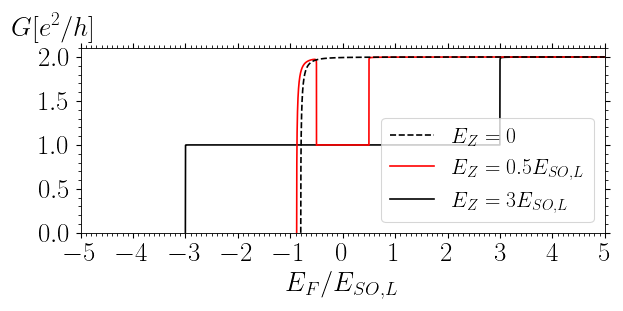

3
0.5
0
plots/paper_plots_2/paper/fig_final/Fig_3_a.pdf


In [5]:
# %matplotlib inline

reload(plt)
%matplotlib notebook
%matplotlib notebook
import matplotlib.pyplot as plt 


plt.rcParams['text.usetex'] = True

fig, axs = plt.subplots(1, figsize=(10, 5), dpi=100, tight_layout=True, facecolor='white')

k_list = list(trasmission_coeff_total.keys())

colors = ["black", "r", "black"]
for i, k in enumerate(k_list[1:3]+[k_list[0]]):
    print(k)
    if k == 0:
        axs.plot(en/alp_l, trasmission_coeff_total[k][0],
                   label=r"$E_Z = 0$", color=colors[i], linestyle="dashed")
    else:
        axs.plot(en*k, trasmission_coeff_total[k][0],
                   label=r"$E_Z = "f"{k}"r"E_{SO, L}$", color=colors[i])

# axs.text(-.1, 1.225, region_lbl[0],
#             horizontalalignment='center', 
#             verticalalignment='center', 
#             transform=axs.transAxes, 
#             fontdict=font)
 
axs.set_ylim(0,2.1)
axs.set_xlim(-5, 5)

#get handles and labels
handles, labels = plt.gca().get_legend_handles_labels()
#specify order of items in legend
order = [2,1,0]
#add legend to plot

legend_font_size2 = 20
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order], fontsize = legend_font_size2)


# axs.grid()
# axs.legend(fontsize = legend_font_size)#, bbox_to_anchor=(0.46, 0.65))
axs.set_xlabel(x_label[1], fontdict=font)
axs.set_ylabel(y_label[0], rotation=0, fontdict=font)


axs.yaxis.set_label_coords(*y_label_pos[0])

x_magior = np.array([1])
x_minor = np.array([0.1])

y_magior = np.array([0.5])
y_minor = np.array([0.1])
adjuct_Tick(np.array([axs]), x_magior=x_magior, 
                    x_minor=x_minor, 
                    y_magior=y_magior, 
                    y_minor=y_minor, 
                    size =font["size"])

# plt.title(r"$k_{SO} \, d = "+f"{k_list[0][0]}$", 
# plt.title(r"$E_{SO} = "+f"{k_list[0][1]}E_Z$", 
#               fontsize = 25, x=0.5, y=1.1)

# SAVE = True
SAVE = False
# save_path = BASE_PATH+f"single_interface_varying_E_Z(ESOR=0.8ESOL and  alphaL, alphaR>0).pdf"
save_path = FINAL_PATH+f"Fig_3_a.pdf"
print(save_path)

if SAVE:
    plt.savefig(save_path, 
            transparent = False, 
            bbox_inches='tight')

plt.show()

<IPython.core.display.Javascript object>


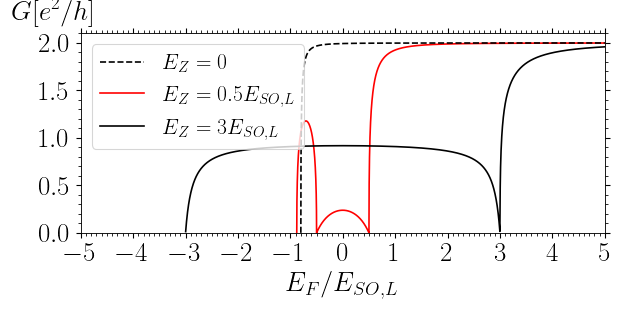

-0.5
-3
0
plots/paper_plots_2/paper/fig_final/Fig_3_b.pdf


In [6]:
# %matplotlib inline

reload(plt)
%matplotlib notebook
%matplotlib notebook
import matplotlib.pyplot as plt 


plt.rcParams['text.usetex'] = True

fig, axs = plt.subplots(1, figsize=(10, 5), dpi=100, tight_layout=True, facecolor='white')

k_list = list(trasmission_coeff_total.keys())

colors = ["r", "black", "black"]
for i, k in enumerate(k_list[3:]+[k_list[0]]):
    print(k)
    if k == 0:
        axs.plot(en/alp_l, trasmission_coeff_total[k][0],
                   label=r"$E_Z = 0$", color=colors[i], linestyle="dashed")
    else:
        axs.plot(en*abs(k), trasmission_coeff_total[k][0],
                   label=r"$E_Z = "f"{abs(k)}"r"E_{SO, L}$", color=colors[i])

# axs.text(-.1, 1.225, region_lbl[1],
#             horizontalalignment='center', 
#             verticalalignment='center', 
#             transform=axs.transAxes, 
#             fontdict=font)
 
axs.set_ylim(0,2.1)
axs.set_xlim(-5, 5)


#get handles and labels
handles, labels = plt.gca().get_legend_handles_labels()
#specify order of items in legend
order = [2, 0, 1]
#add legend to plot

legend_font_size2 = 20
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order], fontsize = legend_font_size2)
# axs.grid()
# axs.legend(fontsize = legend_font_size)#, bbox_to_anchor=(0.46, 0.65))
axs.set_xlabel(x_label[1], fontdict=font)
axs.set_ylabel(y_label[0], rotation=0, fontdict=font)


axs.yaxis.set_label_coords(*y_label_pos[0])

x_magior = np.array([1])
x_minor = np.array([0.1])

y_magior = np.array([0.5])
y_minor = np.array([0.1])
adjuct_Tick(np.array([axs]), x_magior=x_magior, 
                    x_minor=x_minor, 
                    y_magior=y_magior, 
                    y_minor=y_minor, 
                    size =font["size"])

# plt.title(r"$k_{SO} \, d = "+f"{k_list[0][0]}$", 
# plt.title(r"$E_{SO} = "+f"{k_list[0][1]}E_Z$", 
#               fontsize = 25, x=0.5, y=1.1)

# SAVE = True
SAVE = False
# off = 0
# save_path = BASE_PATH+f"single_interface_varying_E_Z(ESOR=0.8ESOL and  alphaL<0, alphaR>0).pdf"
save_path = FINAL_PATH+f"Fig_3_b.pdf"
print(save_path)

if SAVE:
    plt.savefig(save_path, 
            transparent = False, 
            bbox_inches='tight')

plt.show()

# 2 interfaces

## Nanowire contacted to lead

CONFIGURAZIONE NANOWIRE CONTACTED TO LEADS

pannello (a) $k_Z*d=0.1$
* $E_{SO}=0.1*E_Z$ (curva nera)
* $E_{SO}=0.4*E_Z$ (curva rossa)
* $E_{SO}=10*E_Z$ (curva verde) 

pannello (b) $k_Z*d=20$
* $E_{SO}=0.1*E_Z$ (curva nera)
* $E_{SO}=0.4*E_Z$ (curva rossa)
* $E_{SO}=10*E_Z$ (curva verde) 

In [9]:
alp_r = -10
Eso_profile = [0, alp_r, 0]
x_profile = [0, 1]

junction = RashbaJunction([x_profile, Eso_profile])


def g(x, par):
    junction[1] = par[1]
    junction.interface[0] = -par[0] /2
    junction.interface[1] = par[0] / 2
    
    try:
        S = junction.get_scattering_matrix(x)
        if not S.is_unitary:
            print(f"not unitary matrix length: x-> {x}, par-> {par}")
            return np.nan
        else:
            return S.t_coef
    except EnergyOutOfRangeError as e:
        print(e, f"{x=}, {par=}")
        return np.nan
    except InsulatorError as e:
        print(e, f"{x=}, {par=}")
        return np.nanef

        
param = [(.1, .1), (.1, .4), (.1, 10), (10, .1), (10, .4), (10, 10)]

en = np.arange(-1+1e-7, 1.5, 0.0011)

special_opoints = [1]
err = [-1e-10]
for p, e in zip(special_opoints, err):
    idx = np.abs(en - p).argmin()
    en[idx] = p + e

trasmission_coeff_total = make_grid(en, param, [g])#, gp])

# SAVE = True
SAVE = False

<IPython.core.display.Javascript object>


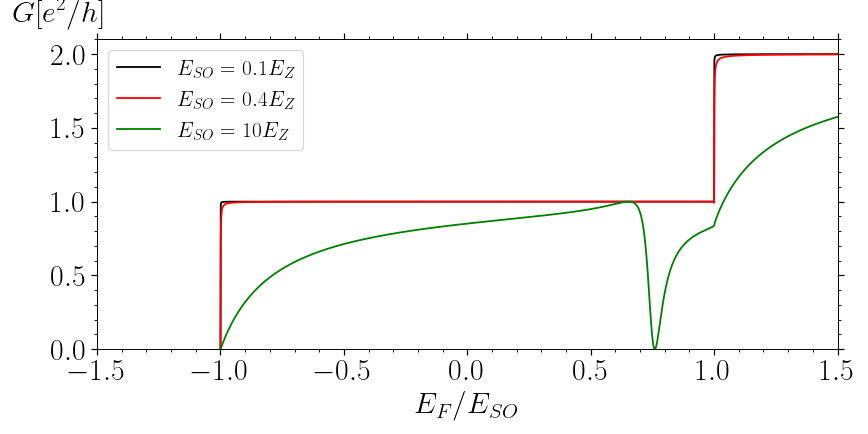

(0.1, 0.1)
(0.1, 0.4)
(0.1, 10)
plots/paper_plots_2/paper/Finite_rashba_nanowire_kZd=0.1.pdf


In [11]:
# %matplotlib inline

reload(plt)
%matplotlib notebook
%matplotlib notebook
import matplotlib.pyplot as plt 


plt.rcParams['text.usetex'] = True

fig, axs = plt.subplots(1, figsize=(10, 5), dpi=DPI, tight_layout=True, facecolor='white')

k_list = list(trasmission_coeff_total.keys())

colors = ["black", "r", "green"]
for i, k in enumerate(k_list[:3]):
    print(k)
    axs.plot(en, trasmission_coeff_total[k][0],
                   label=r"$E_{SO} = "f"{k[1]}"r"E_Z$", color=colors[i])

# axs.text(-.1, 1.225, region_lbl[0],
#             horizontalalignment='center', 
#             verticalalignment='center', 
#             transform=axs.transAxes, 
#             fontdict=font)
 
axs.set_ylim(0,2.1)
axs.set_xlim(-1.5, 1.5)

# axs.grid()
axs.legend(fontsize = legend_font_size)#, bbox_to_anchor=(0.46, 0.65))
axs.set_xlabel(x_label[2], fontdict=font)
axs.set_ylabel(y_label[0], rotation=0, fontdict=font)


axs.yaxis.set_label_coords(*y_label_pos[0])

x_magior = np.array([0.5])
x_minor = np.array([0.1])

y_magior = np.array([0.5])
y_minor = np.array([0.1])
adjuct_Tick(np.array([axs]), x_magior=x_magior, 
                    x_minor=x_minor, 
                    y_magior=y_magior, 
                    y_minor=y_minor, 
                    size =font["size"])

# plt.title(r"$k_{SO} \, d = "+f"{k_list[0][0]}$", 
# plt.title(r"$E_{SO} = "+f"{k_list[0][1]}E_Z$", 
#               fontsize = 25, x=0.5, y=1.1)

# SAVE = True
SAVE = False

save_path = BASE_PATH+f"Finite_rashba_nanowire_kZd={k[0]}.pdf"
print(save_path)

if SAVE:
    plt.savefig(save_path, 
            transparent = False, 
            bbox_inches='tight')

plt.show()

<IPython.core.display.Javascript object>


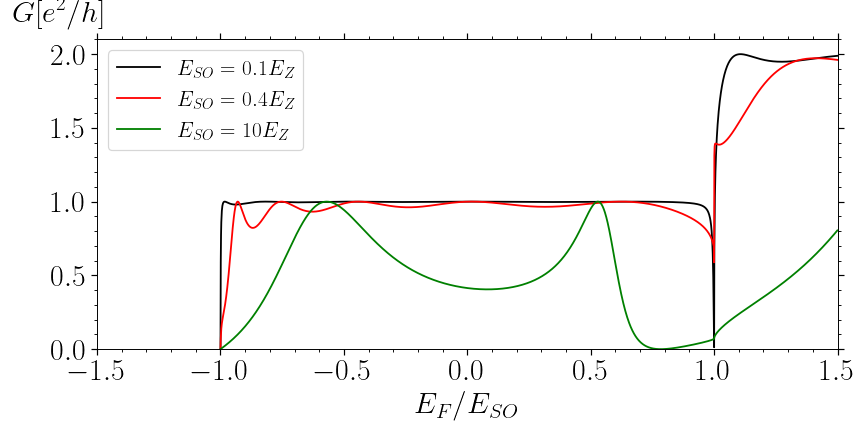

(10, 0.1)
(10, 0.4)
(10, 10)
plots/paper_plots_2/paper/Finite_rashba_nanowire_kZd=10.pdf


In [12]:
# %matplotlib inline

reload(plt)
%matplotlib notebook
%matplotlib notebook
import matplotlib.pyplot as plt 


plt.rcParams['text.usetex'] = True

fig, axs = plt.subplots(1, figsize=(10, 5), dpi=DPI, tight_layout=True, facecolor='white')

k_list = list(trasmission_coeff_total.keys())


colors = ["black", "r", "green"]
for i, k in enumerate(k_list[3:6]):
    print(k)
    axs.plot(en, trasmission_coeff_total[k][0],
                   label=r"$E_{SO} = "f"{abs(k[1])}"r"E_Z$", color=colors[i])

# axs.text(-.1, 1.225, region_lbl[1],
#             horizontalalignment='center', 
#             verticalalignment='center', 
#             transform=axs.transAxes, 
#             fontdict=font)
 
axs.set_ylim(0,2.1)
axs.set_xlim(-1.5, 1.5)

# axs.grid()
axs.legend(fontsize = legend_font_size)#, bbox_to_anchor=(0.46, 0.65))
axs.set_xlabel(x_label[2], fontdict=font)
axs.set_ylabel(y_label[0], rotation=0, fontdict=font)


axs.yaxis.set_label_coords(*y_label_pos[0])

x_magior = np.array(.5)
x_minor = np.array([0.1])

y_magior = np.array([0.5])
y_minor = np.array([0.1])
adjuct_Tick(np.array([axs]), x_magior=x_magior, 
                    x_minor=x_minor, 
                    y_magior=y_magior, 
                    y_minor=y_minor, 
                    size =font["size"])

# plt.title(r"$k_{SO} \, d = "+f"{k_list[0][0]}$", 
# plt.title(r"$E_{SO} = "+f"{k_list[0][1]}E_Z$", 
#               fontsize = 25, x=0.5, y=1.1)

# SAVE = True
SAVE = False
# off = 0
save_path = BASE_PATH+f"Finite_rashba_nanowire_kZd={k[0]}.pdf"
print(save_path)

if SAVE:
    plt.savefig(save_path, 
            transparent = False, 
            bbox_inches='tight')

plt.show()

## Magnetic barier

### Conductance as a function of $E_F/E_Z$

$E_{SOL}=3*E_Z$ $E_{SOR} = 1.5 E_Z$ 

* panel (a) $k_Z*d=0.3/\sqrt{3}$ which should correspond to $k_{SOL}*d=0.3$
* panel (b) $k_Z*d=2/\sqrt{3}$ which should correspond to $k_{SOL}*d=2$
* panel (c) $k_Z*d=10/\sqrt{3}$ which should correspond to $k_{SOL}*d=10$

In each panel there should be two curves (to be indicated in the legenda)
* black curve ($\alpha_L>0 \  \alpha_R>0$)
* red curve ($\alpha_L<0 \  \alpha_R>0$)

The x-axis should go from -2 to +2 a intervalli di 0.5 e la label dovrebbe essere E_F/EZ.

In [3]:
alp_l = 3
# alp_r = 3
alp_r = 1.5
Eso_profile = [alp_l, 0, alp_r]
x_profile = [0, 1]

junction = RashbaJunction([x_profile, Eso_profile])


def g(x, par):
    junction[0] = par[1] * alp_l
    junction.interface[0] = -par[0] /2/np.sqrt(alp_l)
    junction.interface[1] = par[0] / 2/np.sqrt(alp_l)
    
    try:
        S = junction.get_scattering_matrix(x)
        if not S.is_unitary:
            print(f"not unitary matrix length: x-> {x}, par-> {par}")
            return np.nan
        else:
            return S.t_coef
    except EnergyOutOfRangeError as e:
        print(e, f"{x=}, {par=}")
        return np.nan
    except InsulatorError as e:
        print(e, f"{x=}, {par=}")
        return np.nan


        
param = [(.3, 1), (.3, -1), (2, 1), (2, -1), (10, 1), (10, -1)]

en = np.arange(-2, 2, 0.0011)

special_opoints = [1, -1, -alp_r*(1+(1/(2*alp_r))**2)]
err = [-1e-10, 1e-10, 1e-7]
for p, e in zip(special_opoints, err):
    idx = np.abs(en - p).argmin()
    en[idx] = p + e

trasmission_coeff_total = make_grid(en, param, [g])#, gp])

# SAVE = True
SAVE = False

In Rashba dominated regime E = -2.00 < -Eso (1 + (Ez/2Eso)^2) = -1.67 x=-2.0, par=(0.3, 1)
In Rashba dominated regime E = -2.00 < -Eso (1 + (Ez/2Eso)^2) = -1.67 x=-1.9989, par=(0.3, 1)
In Rashba dominated regime E = -2.00 < -Eso (1 + (Ez/2Eso)^2) = -1.67 x=-1.9977999999999998, par=(0.3, 1)
In Rashba dominated regime E = -2.00 < -Eso (1 + (Ez/2Eso)^2) = -1.67 x=-1.9966999999999997, par=(0.3, 1)
In Rashba dominated regime E = -2.00 < -Eso (1 + (Ez/2Eso)^2) = -1.67 x=-1.9955999999999996, par=(0.3, 1)
In Rashba dominated regime E = -1.99 < -Eso (1 + (Ez/2Eso)^2) = -1.67 x=-1.9944999999999995, par=(0.3, 1)
In Rashba dominated regime E = -1.99 < -Eso (1 + (Ez/2Eso)^2) = -1.67 x=-1.9933999999999994, par=(0.3, 1)
In Rashba dominated regime E = -1.99 < -Eso (1 + (Ez/2Eso)^2) = -1.67 x=-1.9922999999999993, par=(0.3, 1)
In Rashba dominated regime E = -1.99 < -Eso (1 + (Ez/2Eso)^2) = -1.67 x=-1.9911999999999992, par=(0.3, 1)
In Rashba dominated regime E = -1.99 < -Eso (1 + (Ez/2Eso)^2) = -1.67 x=-

In Rashba dominated regime E = -2.00 < -Eso (1 + (Ez/2Eso)^2) = -1.67 x=-2.0, par=(0.3, -1)
In Rashba dominated regime E = -2.00 < -Eso (1 + (Ez/2Eso)^2) = -1.67 x=-1.9989, par=(0.3, -1)
In Rashba dominated regime E = -2.00 < -Eso (1 + (Ez/2Eso)^2) = -1.67 x=-1.9977999999999998, par=(0.3, -1)
In Rashba dominated regime E = -2.00 < -Eso (1 + (Ez/2Eso)^2) = -1.67 x=-1.9966999999999997, par=(0.3, -1)
In Rashba dominated regime E = -2.00 < -Eso (1 + (Ez/2Eso)^2) = -1.67 x=-1.9955999999999996, par=(0.3, -1)
In Rashba dominated regime E = -1.99 < -Eso (1 + (Ez/2Eso)^2) = -1.67 x=-1.9944999999999995, par=(0.3, -1)
In Rashba dominated regime E = -1.99 < -Eso (1 + (Ez/2Eso)^2) = -1.67 x=-1.9933999999999994, par=(0.3, -1)
In Rashba dominated regime E = -1.99 < -Eso (1 + (Ez/2Eso)^2) = -1.67 x=-1.9922999999999993, par=(0.3, -1)
In Rashba dominated regime E = -1.99 < -Eso (1 + (Ez/2Eso)^2) = -1.67 x=-1.9911999999999992, par=(0.3, -1)
In Rashba dominated regime E = -1.99 < -Eso (1 + (Ez/2Eso)^2) = 

In Rashba dominated regime E = -2.00 < -Eso (1 + (Ez/2Eso)^2) = -1.67 x=-2.0, par=(2, 1)
In Rashba dominated regime E = -2.00 < -Eso (1 + (Ez/2Eso)^2) = -1.67 x=-1.9989, par=(2, 1)
In Rashba dominated regime E = -2.00 < -Eso (1 + (Ez/2Eso)^2) = -1.67 x=-1.9977999999999998, par=(2, 1)
In Rashba dominated regime E = -2.00 < -Eso (1 + (Ez/2Eso)^2) = -1.67 x=-1.9966999999999997, par=(2, 1)
In Rashba dominated regime E = -2.00 < -Eso (1 + (Ez/2Eso)^2) = -1.67 x=-1.9955999999999996, par=(2, 1)
In Rashba dominated regime E = -1.99 < -Eso (1 + (Ez/2Eso)^2) = -1.67 x=-1.9944999999999995, par=(2, 1)
In Rashba dominated regime E = -1.99 < -Eso (1 + (Ez/2Eso)^2) = -1.67 x=-1.9933999999999994, par=(2, 1)
In Rashba dominated regime E = -1.99 < -Eso (1 + (Ez/2Eso)^2) = -1.67 x=-1.9922999999999993, par=(2, 1)
In Rashba dominated regime E = -1.99 < -Eso (1 + (Ez/2Eso)^2) = -1.67 x=-1.9911999999999992, par=(2, 1)
In Rashba dominated regime E = -1.99 < -Eso (1 + (Ez/2Eso)^2) = -1.67 x=-1.990099999999999,

In Rashba dominated regime E = -2.00 < -Eso (1 + (Ez/2Eso)^2) = -1.67 x=-2.0, par=(2, -1)
In Rashba dominated regime E = -2.00 < -Eso (1 + (Ez/2Eso)^2) = -1.67 x=-1.9989, par=(2, -1)
In Rashba dominated regime E = -2.00 < -Eso (1 + (Ez/2Eso)^2) = -1.67 x=-1.9977999999999998, par=(2, -1)
In Rashba dominated regime E = -2.00 < -Eso (1 + (Ez/2Eso)^2) = -1.67 x=-1.9966999999999997, par=(2, -1)
In Rashba dominated regime E = -2.00 < -Eso (1 + (Ez/2Eso)^2) = -1.67 x=-1.9955999999999996, par=(2, -1)
In Rashba dominated regime E = -1.99 < -Eso (1 + (Ez/2Eso)^2) = -1.67 x=-1.9944999999999995, par=(2, -1)
In Rashba dominated regime E = -1.99 < -Eso (1 + (Ez/2Eso)^2) = -1.67 x=-1.9933999999999994, par=(2, -1)
In Rashba dominated regime E = -1.99 < -Eso (1 + (Ez/2Eso)^2) = -1.67 x=-1.9922999999999993, par=(2, -1)
In Rashba dominated regime E = -1.99 < -Eso (1 + (Ez/2Eso)^2) = -1.67 x=-1.9911999999999992, par=(2, -1)
In Rashba dominated regime E = -1.99 < -Eso (1 + (Ez/2Eso)^2) = -1.67 x=-1.9900999

In Rashba dominated regime E = -2.00 < -Eso (1 + (Ez/2Eso)^2) = -1.67 x=-2.0, par=(10, 1)
In Rashba dominated regime E = -2.00 < -Eso (1 + (Ez/2Eso)^2) = -1.67 x=-1.9989, par=(10, 1)
In Rashba dominated regime E = -2.00 < -Eso (1 + (Ez/2Eso)^2) = -1.67 x=-1.9977999999999998, par=(10, 1)
In Rashba dominated regime E = -2.00 < -Eso (1 + (Ez/2Eso)^2) = -1.67 x=-1.9966999999999997, par=(10, 1)
In Rashba dominated regime E = -2.00 < -Eso (1 + (Ez/2Eso)^2) = -1.67 x=-1.9955999999999996, par=(10, 1)
In Rashba dominated regime E = -1.99 < -Eso (1 + (Ez/2Eso)^2) = -1.67 x=-1.9944999999999995, par=(10, 1)
In Rashba dominated regime E = -1.99 < -Eso (1 + (Ez/2Eso)^2) = -1.67 x=-1.9933999999999994, par=(10, 1)
In Rashba dominated regime E = -1.99 < -Eso (1 + (Ez/2Eso)^2) = -1.67 x=-1.9922999999999993, par=(10, 1)
In Rashba dominated regime E = -1.99 < -Eso (1 + (Ez/2Eso)^2) = -1.67 x=-1.9911999999999992, par=(10, 1)
In Rashba dominated regime E = -1.99 < -Eso (1 + (Ez/2Eso)^2) = -1.67 x=-1.9900999

In Rashba dominated regime E = -2.00 < -Eso (1 + (Ez/2Eso)^2) = -1.67 x=-2.0, par=(10, -1)
In Rashba dominated regime E = -2.00 < -Eso (1 + (Ez/2Eso)^2) = -1.67 x=-1.9989, par=(10, -1)
In Rashba dominated regime E = -2.00 < -Eso (1 + (Ez/2Eso)^2) = -1.67 x=-1.9977999999999998, par=(10, -1)
In Rashba dominated regime E = -2.00 < -Eso (1 + (Ez/2Eso)^2) = -1.67 x=-1.9966999999999997, par=(10, -1)
In Rashba dominated regime E = -2.00 < -Eso (1 + (Ez/2Eso)^2) = -1.67 x=-1.9955999999999996, par=(10, -1)
In Rashba dominated regime E = -1.99 < -Eso (1 + (Ez/2Eso)^2) = -1.67 x=-1.9944999999999995, par=(10, -1)
In Rashba dominated regime E = -1.99 < -Eso (1 + (Ez/2Eso)^2) = -1.67 x=-1.9933999999999994, par=(10, -1)
In Rashba dominated regime E = -1.99 < -Eso (1 + (Ez/2Eso)^2) = -1.67 x=-1.9922999999999993, par=(10, -1)
In Rashba dominated regime E = -1.99 < -Eso (1 + (Ez/2Eso)^2) = -1.67 x=-1.9911999999999992, par=(10, -1)
In Rashba dominated regime E = -1.99 < -Eso (1 + (Ez/2Eso)^2) = -1.67 x=-

<IPython.core.display.Javascript object>


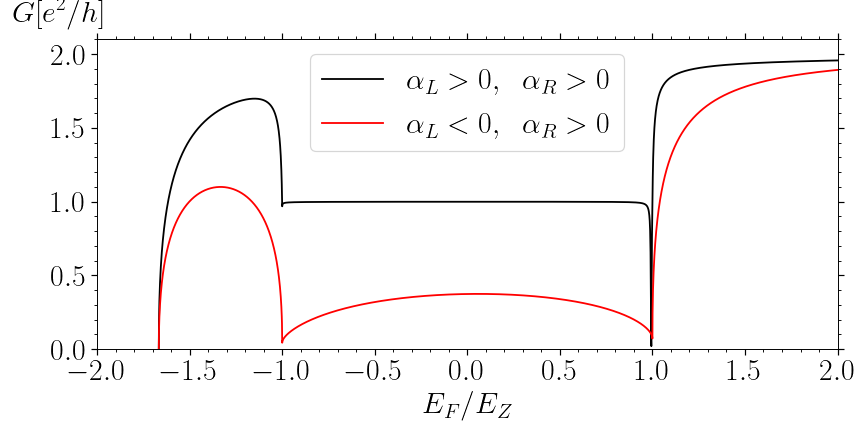

0.3
0.3
plots/paper_plots_2/paper/fig_final/Fig_5_a.pdf


In [4]:
# %matplotlib inline

reload(plt)
%matplotlib notebook
%matplotlib notebook
import matplotlib.pyplot as plt 


plt.rcParams['text.usetex'] = True

fig, axs = plt.subplots(1, figsize=(10, 5), dpi=DPI, tight_layout=True, facecolor='white')

k_list = list(trasmission_coeff_total.keys())

lable_map = {1: r"$\alpha_L>0, \hspace{0.5cm}  \alpha_R>0$", -1: r"$\alpha_L<0, \hspace{0.5cm} \alpha_R>0$"}
colors = ["black", "r"]

for i, k in enumerate(k_list[:2]):
    print(k[0])
#     fr"$2E_{{SO}}^{{(L)}} = {lable_map[round(k[0],1)]}  E_Z$,"
#                              fr"\ $2E_{{SO}}^{{(R)}} = {lable_map[round(k[0],1)]}  E_Z $"
#     lbl_string = f"L({lable_map[round(k[0],1)]}), R({lable_map[round(k[1],1)]})"
    axs.plot(en, trasmission_coeff_total[k][0],
                   label=lable_map[k[1]], color=colors[i])


axs.set_ylim(0,2.1)
axs.set_xlim(-2, 2)

# axs.grid()
legend_font_size2 = 25
axs.legend(fontsize = legend_font_size2)#, bbox_to_anchor=(0.5, 0.65))
axs.set_xlabel(x_label[0], fontdict=font)
axs.set_ylabel(y_label[0], rotation=0, fontdict=font)


axs.yaxis.set_label_coords(*y_label_pos[0])

x_magior = np.array([.5])
x_minor = np.array([0.1])

y_magior = np.array([0.5])
y_minor = np.array([0.1])
adjuct_Tick(np.array([axs]), x_magior=x_magior, 
                    x_minor=x_minor, 
                    y_magior=y_magior, 
                    y_minor=y_minor, 
                    size =font["size"])

# plt.title(r"$k_{SO} \, d = "+f"{k_list[0][0]}$", 
# plt.title(r"$E_{SO} = "+f"{k_list[0][1]}E_Z$", 
#               fontsize = 25, x=0.5, y=1.1)

# SAVE = True
SAVE = False
# save_path = BASE_PATH+f"magnetic barier kso*d = {k[0]} Eso=(pm{alp_l}, {alp_r}).pdf"
save_path = FINAL_PATH+f"Fig_5_a.pdf"
print(save_path)

if SAVE:
    plt.savefig(save_path, 
            transparent = False, 
            bbox_inches='tight')

plt.show()

<IPython.core.display.Javascript object>


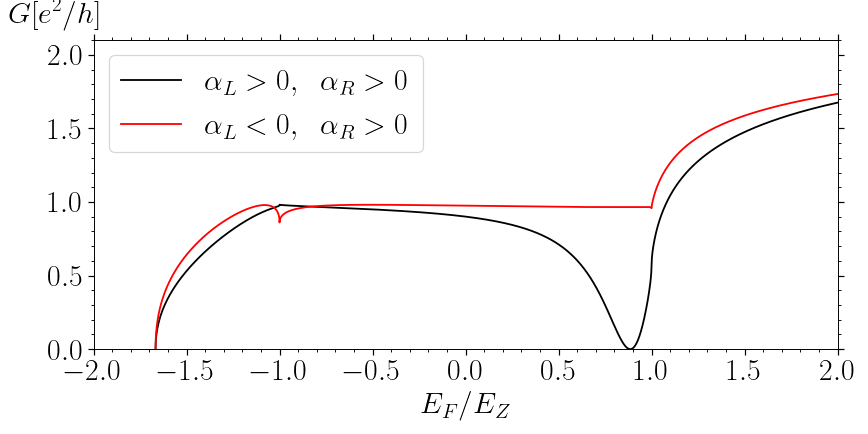

2
2
plots/paper_plots_2/paper/fig_final/Fig_5_c.pdf


In [15]:
# %matplotlib inline

reload(plt)
%matplotlib notebook
%matplotlib notebook
import matplotlib.pyplot as plt 


plt.rcParams['text.usetex'] = True

fig, axs = plt.subplots(1, figsize=(10, 5), dpi=DPI, tight_layout=True, facecolor='white')

k_list = list(trasmission_coeff_total.keys())

# lable_map = {1: r"$\alpha_L>0 \  \alpha_R>0$", -1: r"$\alpha_L<0 \  \alpha_R>0$"}
lable_map = {1: r"$\alpha_L>0, \hspace{0.5cm}  \alpha_R>0$", -1: r"$\alpha_L<0, \hspace{0.5cm} \alpha_R>0$"}

colors = ["black", "r"]

for i, k in enumerate(k_list[2:4]):
    print(k[0])
#     fr"$2E_{{SO}}^{{(L)}} = {lable_map[round(k[0],1)]}  E_Z$,"
#                              fr"\ $2E_{{SO}}^{{(R)}} = {lable_map[round(k[0],1)]}  E_Z $"
#     lbl_string = f"L({lable_map[round(k[0],1)]}), R({lable_map[round(k[1],1)]})"
    axs.plot(en, trasmission_coeff_total[k][0],
                   label=lable_map[k[1]], color=colors[i])


axs.set_ylim(0,2.1)
axs.set_xlim(-2, 2)

# axs.grid()
legend_font_size2 = 25
axs.legend(fontsize = legend_font_size2)#, bbox_to_anchor=(0.46, 0.65))
axs.set_xlabel(x_label[0], fontdict=font)
axs.set_ylabel(y_label[0], rotation=0, fontdict=font)


axs.yaxis.set_label_coords(*y_label_pos[0])

x_magior = np.array([.5])
x_minor = np.array([0.1])

y_magior = np.array([0.5])
y_minor = np.array([0.1])
adjuct_Tick(np.array([axs]), x_magior=x_magior, 
                    x_minor=x_minor, 
                    y_magior=y_magior, 
                    y_minor=y_minor, 
                    size =font["size"])

# plt.title(r"$k_{SO} \, d = "+f"{k_list[0][0]}$", 
# plt.title(r"$E_{SO} = "+f"{k_list[0][1]}E_Z$", 
#               fontsize = 25, x=0.5, y=1.1)

# SAVE = True
SAVE = False
# save_path = BASE_PATH+f"magnetic barier kso*d = {k[0]} Eso=(pm{alp_l}, {alp_r}).pdf"
save_path = FINAL_PATH+f"Fig_5_c.pdf"
print(save_path)

if SAVE:
    plt.savefig(save_path, 
            transparent = False, 
            bbox_inches='tight')

plt.show()

<IPython.core.display.Javascript object>


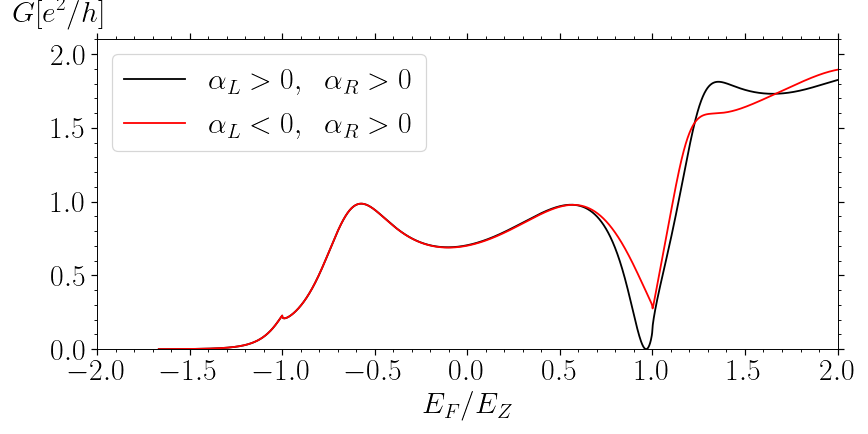

10
10
plots/paper_plots_2/paper/fig_final/Fig_5_b.pdf


In [16]:
# %matplotlib inline

reload(plt)
%matplotlib notebook
%matplotlib notebook
import matplotlib.pyplot as plt 


plt.rcParams['text.usetex'] = True

fig, axs = plt.subplots(1, figsize=(10, 5), dpi=DPI, tight_layout=True, facecolor='white')

k_list = list(trasmission_coeff_total.keys())

# lable_map = {1: r"$\alpha_L>0 \  \alpha_R>0$", -1: r"$\alpha_L<0 \  \alpha_R>0$"}
lable_map = {1: r"$\alpha_L>0, \hspace{0.5cm}  \alpha_R>0$", -1: r"$\alpha_L<0, \hspace{0.5cm} \alpha_R>0$"}

colors = ["black", "r"]

for i, k in enumerate(k_list[4:]):
    print(k[0])
#     fr"$2E_{{SO}}^{{(L)}} = {lable_map[round(k[0],1)]}  E_Z$,"
#                              fr"\ $2E_{{SO}}^{{(R)}} = {lable_map[round(k[0],1)]}  E_Z $"
#     lbl_string = f"L({lable_map[round(k[0],1)]}), R({lable_map[round(k[1],1)]})"
    axs.plot(en, trasmission_coeff_total[k][0],
                   label=lable_map[k[1]], color=colors[i])

axs.set_ylim(0,2.1)
axs.set_xlim(-2, 2)

# axs.grid()
legend_font_size2 = 25
axs.legend(fontsize = legend_font_size2)#, bbox_to_anchor=(0.46, 0.65))
axs.set_xlabel(x_label[0], fontdict=font)
axs.set_ylabel(y_label[0], rotation=0, fontdict=font)


axs.yaxis.set_label_coords(*y_label_pos[0])

x_magior = np.array([.5])
x_minor = np.array([0.1])

y_magior = np.array([0.5])
y_minor = np.array([0.1])
adjuct_Tick(np.array([axs]), x_magior=x_magior, 
                    x_minor=x_minor, 
                    y_magior=y_magior, 
                    y_minor=y_minor, 
                    size =font["size"])

# SAVE = True
SAVE = False
# save_path = BASE_PATH+f"magnetic barier kso*d = {k[0]} Eso=(pm{alp_l}, {alp_r}).pdf"
save_path = FINAL_PATH+f"Fig_5_b.pdf"
print(save_path)

if SAVE:
    plt.savefig(save_path, 
            transparent = False, 
            bbox_inches='tight')

plt.show()

### Conductance as a function of $k_{SOL}*d$ [from 0.1 to 20]

$E_{SOL} = 3*E_Z$ $E_{SOR} = 1.5 E_Z$

(nel codice farai variare $k_Z*d$, ma poi per fare il grafico la colonna delle x dovrà contenere $k_{SOL}*d=\sqrt{3}*kZ*d$, quindi $k_Z*d$ dovrà variare da $0.1/\sqrt{3}$ a $20/\sqrt{3}$)

panel (a) $\alpha_L>0 \  \alpha_R>0$
* 3 curves displaying the conductance at fixed energy
* $E=0$ (black)
* $E=+0.8*E_Z$ (red)
* $E=-0.8*E_Z$(green)

panel (b)   $\alpha_L<0 \  \alpha_R>0$
* 3 curves displaying the conductance at fixed energy
* $E=0$ (black)
* $E=+0.8*E_Z$ (red)
* $E=-0.8*E_Z$(green)

In [10]:
alp_l = 3
alp_r = 1.5
Eso_profile = [alp_l, 0, alp_r]
x_profile = [0, 1]

junction = RashbaJunction([x_profile, Eso_profile])


def g(x, par):
    junction[0] = par[0] * alp_l
    junction.interface[0] = -x /2/np.sqrt(alp_l)
    junction.interface[1] = x /2/np.sqrt(alp_l)
    
    try:
        S = junction.get_scattering_matrix(par[1])
        if not S.is_unitary:
            print(f"not unitary matrix length: x-> {x}, par-> {par}")
            return np.nan
        else:
            return S.t_coef
    except EnergyOutOfRangeError as e:
        print(e, f"{x=}, {par=}")
        return np.nan
    except InsulatorError as e:
        print(e, f"{x=}, {par=}")
        return np.nan


        
param = [(1, 0), (1, .8), (1, -.8), (-1, 0), (-1, .8), (-1, -.8)]

en = np.arange(0., 20, 0.011)


trasmission_coeff_total = make_grid(en, param, [g])#, gp])

# SAVE = True
SAVE = False

<IPython.core.display.Javascript object>


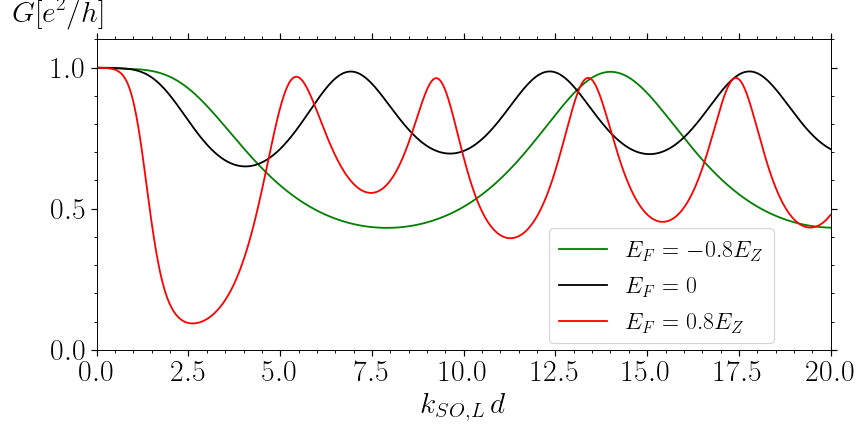

(1, -0.8)
(1, 0)
(1, 0.8)
plots/paper_plots_2/paper/magnetic barier in function of kso*d, Eso=(3, 0, 1.5).pdf


In [11]:
# %matplotlib inline

reload(plt)
%matplotlib notebook
%matplotlib notebook
import matplotlib.pyplot as plt 


plt.rcParams['text.usetex'] = True

fig, axs = plt.subplots(1, figsize=(10, 5), dpi=DPI, tight_layout=True, facecolor='white')

k_list = list(trasmission_coeff_total.keys())

colors = ["green", "black", "r"]
for i, k in enumerate([k_list[2]]+k_list[:2]):
    print(k)
    if k[1] == 0:
        axs.plot(en, trasmission_coeff_total[k][0],
                   label=r"$E_F = 0$", color=colors[i])
    else:
        axs.plot(en, trasmission_coeff_total[k][0],
                   label=r"$E_F = "f"{k[1]}"r"E_Z$", color=colors[i])


axs.set_ylim(0,1.1)
axs.set_xlim(0, 20)

# axs.grid()
legend_font_size2 = 20
axs.legend(fontsize = legend_font_size2, bbox_to_anchor=(0.6, 0.43))
axs.set_xlabel(x_label[3], fontdict=font)
axs.set_ylabel(y_label[0], rotation=0, fontdict=font)


axs.yaxis.set_label_coords(*y_label_pos[0])

x_magior = np.array([2.5])
x_minor = np.array([0.5])

y_magior = np.array([0.5])
y_minor = np.array([0.1])
adjuct_Tick(np.array([axs]), x_magior=x_magior, 
                    x_minor=x_minor, 
                    y_magior=y_magior, 
                    y_minor=y_minor, 
                    size =font["size"])

# plt.title(r"$k_{SO} \, d = "+f"{k_list[0][0]}$", 
# plt.title(r"$E_{SO} = "+f"{k_list[0][1]}E_Z$", 
#               fontsize = 25, x=0.5, y=1.1)

# SAVE = True
SAVE = False

save_path = BASE_PATH+f"magnetic barier in function of kso*d, Eso=({alp_l}, 0, {alp_r}).pdf"
print(save_path)

if SAVE:
    plt.savefig(save_path, 
            transparent = False, 
            bbox_inches='tight')

plt.show()

<IPython.core.display.Javascript object>


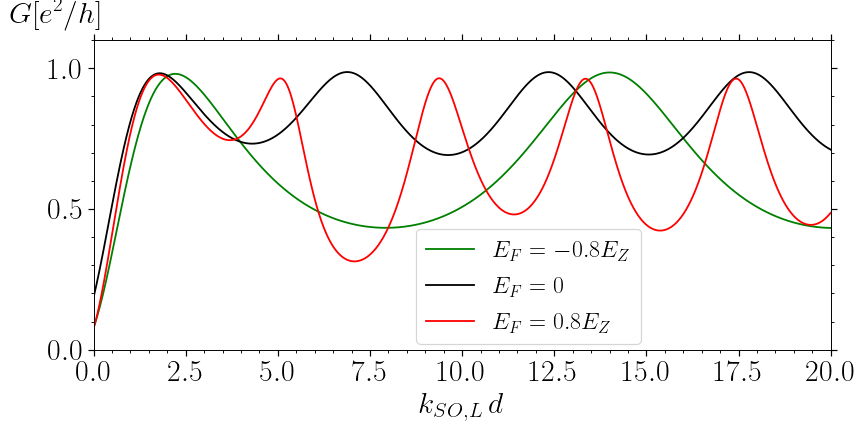

(-1, -0.8)
(-1, 0)
(-1, 0.8)
plots/paper_plots_2/paper/magnetic barier in function of kso*d, Eso=(-3, 0, 1.5).pdf


In [12]:
# %matplotlib inline

reload(plt)
%matplotlib notebook
%matplotlib notebook
import matplotlib.pyplot as plt 


plt.rcParams['text.usetex'] = True

fig, axs = plt.subplots(1, figsize=(10, 5), dpi=DPI, tight_layout=True, facecolor='white')

k_list = list(trasmission_coeff_total.keys())

colors = ["green", "black", "r"]
for i, k in enumerate([k_list[-1]]+k_list[3:-1]):
    print(k)
    if k[1] == 0:
        axs.plot(en, trasmission_coeff_total[k][0],
                   label=r"$E_F = 0$", color=colors[i])
    else:
        axs.plot(en, trasmission_coeff_total[k][0],
                   label=r"$E_F = "f"{k[1]}"r"E_Z$", color=colors[i])


axs.set_ylim(0,1.1)
axs.set_xlim(0, 20)


# axs.grid()
axs.legend(fontsize = legend_font_size2, bbox_to_anchor=(0.59, 0.43))
axs.set_xlabel(x_label[3], fontdict=font)
axs.set_ylabel(y_label[0], rotation=0, fontdict=font)


axs.yaxis.set_label_coords(*y_label_pos[0])

x_magior = np.array([2.5])
x_minor = np.array([0.5])

y_magior = np.array([0.5])
y_minor = np.array([0.1])
adjuct_Tick(np.array([axs]), x_magior=x_magior, 
                    x_minor=x_minor, 
                    y_magior=y_magior, 
                    y_minor=y_minor, 
                    size =font["size"])


# SAVE = True
SAVE = False

save_path = BASE_PATH+f"magnetic barier in function of kso*d, Eso=(-{alp_l}, 0, {alp_r}).pdf"
print(save_path)

if SAVE:
    plt.savefig(save_path, 
            transparent = False, 
            bbox_inches='tight')

plt.show()

### conductance as function $E_{SO, L}/E_{SO, R}$

In [13]:
ev_to_j = 1.602176634e-19
#InSb
m = 0.015*cc.m_e

k_so = np.sqrt(2 *m* 0.3e-3*ev_to_j)/cc.hbar
l_so = 1/k_so
print(f"k_z {k_so}") #1/Metr
print(f"l_so {l_so*10**9:.2f}nm") #Metr

k_z 10867878.84655432
l_so 92.01nm


In [15]:
alp_r =  3
Eso_profile = [1, 0, alp_r]
x_profile = [0, 1]

junction = RashbaJunction([x_profile, Eso_profile])


def g(x, par):
    junction[0] = x * alp_r
    junction.interface[0] = -par / 2 /np.sqrt(alp_r)
    junction.interface[1] = par /2 / np.sqrt(alp_r)
    try:
        S = junction.get_scattering_matrix(0)
        if not S.is_unitary:
            print(f"not unitary matrix length: x-> {x}, par-> {par}")
            return np.nan
        else:
            return S.t_coef
    except EnergyOutOfRangeError as e:
        print(e, f"{x=}, {par=}")
        return np.nan
    except InsulatorError as e:
        print(e, f"{x=}, {par=}")
        return np.nan

        
param = np.array([0.3, 1, 2, 10]) * 100 / 92

print(param)
print(np.array(param)/np.sqrt(alp_r))

en = np.arange(-25, 25, 0.011)
# en = np.arange(-40, 40, 0.11)

special_opoints = [0]
err = [0]
for p, e in zip(special_opoints, err):
    idx = np.abs(en - p).argmin()
    en[idx] = p + e

trasmission_coeff_total = make_grid(en, param, [g])#, gp])

# SAVE = True
SAVE = False

[ 0.32608696  1.08695652  2.17391304 10.86956522]
[0.18826639 0.62755464 1.25510928 6.2755464 ]


<IPython.core.display.Javascript object>


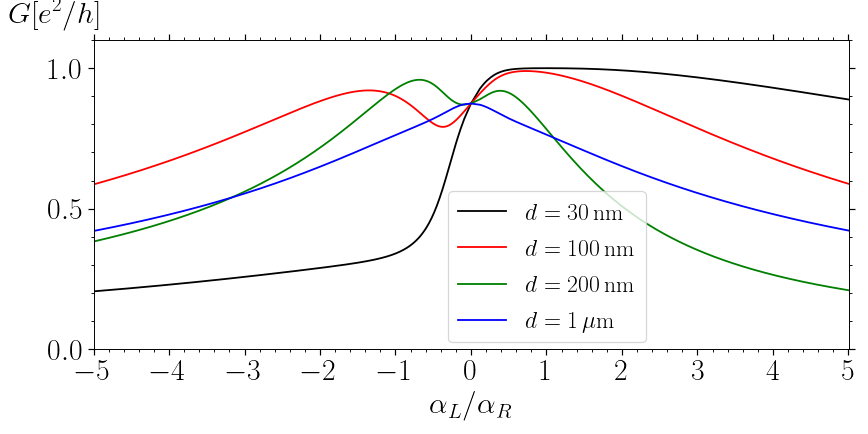

0.32608695652173914
1.0869565217391304
2.1739130434782608
10.869565217391305
plots/paper_plots_2/paper/fig_final/Fig7.pdf


In [17]:
# %matplotlib inline

reload(plt)
%matplotlib notebook
%matplotlib notebook
import matplotlib.pyplot as plt 


plt.rcParams['text.usetex'] = True

fig, axs = plt.subplots(1, figsize=(10, 5), dpi=DPI, tight_layout=True, facecolor='white')

k_list = list(trasmission_coeff_total.keys())

# lable_map = {1: r"$\alpha_L>0 \  \alpha_R>0$", -1: r"$\alpha_L<0 \  \alpha_R>0$"}
colors = ["black", "r", "g", "b"]

for i, k in enumerate(k_list):
    print(k)
#     fr"$2E_{{SO}}^{{(L)}} = {lable_map[round(k[0],1)]}  E_Z$,"
#                              fr"\ $2E_{{SO}}^{{(R)}} = {lable_map[round(k[0],1)]}  E_Z $"
#     lbl_string = f"L({lable_map[round(k[0],1)]}), R({lable_map[round(k[1],1)]})"
    if k>10:
        lbl = r"$d = "f"{1}\, \mu "+r"\textrm{m}$"
    else:
        lbl = r"$d = "f"{k*l_so*10**9:.0f}"+r"\, \textrm{nm}$"
    axs.plot(np.sign(en)*np.sqrt(np.abs(en)), trasmission_coeff_total[k][0],
#                    label=r"$k_{SO,R}d = "f"{k}$", color=colors[i])
                   label=lbl, color=colors[i])


axs.set_ylim(0,1.1)
# axs.set_xlim(en[0], en[-1]+0.01)
axs.set_xlim(-5, 5+0.01)


# axs.grid()
legend_font_size2 = 20
axs.legend(fontsize = legend_font_size2, bbox_to_anchor=(0.6, 0.55))
axs.set_xlabel(r"$\alpha_L/\alpha_R$", fontdict=font)
# axs.set_xlabel(x_label[4], fontdict=font)
axs.set_ylabel(y_label[0], rotation=0, fontdict=font)


axs.yaxis.set_label_coords(*y_label_pos[0])

x_magior = np.array([1])
x_minor = np.array([0.2])

y_magior = np.array([0.5])
y_minor = np.array([0.1])
adjuct_Tick(np.array([axs]), x_magior=x_magior, 
                    x_minor=x_minor, 
                    y_magior=y_magior, 
                    y_minor=y_minor, 
                    size =font["size"])

# plt.title(r"$k_{SO} \, d = "+f"{k_list[0][0]}$", 
# plt.title(r"$E_{SO} = "+f"{k_list[0][1]}E_Z$", 
#               fontsize = 25, x=0.5, y=1.1)

# SAVE = True
SAVE = False

# save_path = BASE_PATH+f"Conductance as function of alphaL\\alphaR with E = 0, ESOR = {alp_r} EZ.pdf"
save_path = FINAL_PATH+f"Fig7.pdf"
print(save_path)

if SAVE:
    plt.savefig(save_path, 
            transparent = False, 
            bbox_inches='tight')

plt.show()